In [1]:
! python --version

Python 3.11.9


In [2]:
import numpy as np
import pandas as pd

import os
import warnings

import seaborn as sns

import scanpy as sc
import anndata as an
import scanorama
import squidpy as sq

from pathlib import Path

import geopandas as gpd

from shapely.geometry import Polygon, MultiPolygon, Point
from shapely.affinity import affine_transform

import math

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm, colors
from matplotlib.lines import Line2D
from matplotlib.collections import PatchCollection
from matplotlib import patches
from matplotlib.patches import Polygon as MplPolygon

sc.logging.print_versions()

-----
anndata     0.10.7
scanpy      1.10.0
-----
PIL                         10.3.0
annoy                       NA
anyio                       NA
asciitree                   NA
asttokens                   NA
attr                        23.1.0
attrs                       23.1.0
babel                       2.11.0
brotli                      1.0.9
certifi                     2025.01.31
cffi                        1.16.0
charset_normalizer          2.0.4
cloudpickle                 3.0.0
colorama                    0.4.6
comm                        0.2.1
cycler                      0.12.1
cython_runtime              NA
dask                        2024.5.0
dask_expr                   1.1.0
dask_image                  2023.08.1
datashader                  0.16.1
datatree                    0.0.14
dateutil                    2.8.2
debugpy                     1.6.7
decorator                   5.1.1
defusedxml                  0.7.1
docrep                      0.3.2
executing                  

## import in data sets, trim down to area of interest, calculate QC metrics

Sample information: 


VGN1e1 = late double ridge, VRT-A2a (P1 WT)

VGN1e9 = late double ridge, VRT-A2b (P1 Pol)

VGN1b6 = lemma primorida, VRT-A2a (P1 WT)

VGN1b8 = lemma primorida, VRT-A2b (P1 Pol)

VGN1a6 = terminal spikelet, VRT-A2a (P1 WT)

VGN1a4 = terminal spikelet, VRT-A2b (P1 Pol)

VGN1c2 = carpel extension round, VRT-A2a (P1 WT)

VGN1c3 = carpel extension round, VRT-A2b (P1 Pol)

See vignette: https://squidpy.readthedocs.io/en/stable/notebooks/tutorials/tutorial_vizgen_mouse_liver.html

## Read in raw spatial data from eight selected samples 

filter to just 200 spike related genes, crop to area of interest


In [4]:
# Read the list of genes, 200 spike genes subset 
genes_to_include_file =  "GenePanel/file_records/subset_spikegenes_list.txt"

with open(genes_to_include_file, "r") as file:
    genes_to_include = [line.strip() for line in file]

In [5]:
import warnings
warnings.simplefilter("ignore")


#VGN1a6
adata_VGN1a6 = sq.read.vizgen(
    path="C:/Users/longk/OneDrive - Norwich Bioscience Institutes/PhD/Experimental Details/longk_exp9_VizGen/cell_segmentation/VGN1a_region6_output/",
    counts_file="cell_by_gene.csv",
    meta_file="cell_metadata.csv",
    transformation_file="micron_to_mosaic_pixel_transform.csv"
)
# filters to 200 genes 
adata_VGN1a6 = adata_VGN1a6[:, adata_VGN1a6.var_names.isin(genes_to_include)]

#VGN1a4
adata_VGN1a4 = sq.read.vizgen(
    path="C:/Users/longk/OneDrive - Norwich Bioscience Institutes/PhD/Experimental Details/longk_exp9_VizGen/cell_segmentation/VGN1a_region4_output/",
    counts_file="cell_by_gene.csv",
    meta_file="cell_metadata.csv",
    transformation_file="micron_to_mosaic_pixel_transform.csv"
)
# filters to 200 genes
adata_VGN1a4 = adata_VGN1a4[:, adata_VGN1a4.var_names.isin(genes_to_include)]

#VGN1b6
adata_VGN1b6 = sq.read.vizgen(
    path="C:/Users/longk/OneDrive - Norwich Bioscience Institutes/PhD/Experimental Details/longk_exp9_VizGen/cell_segmentation/VGN1b_region6_output/",
    counts_file="cell_by_gene.csv",
    meta_file="cell_metadata.csv",
    transformation_file="micron_to_mosaic_pixel_transform.csv"
)

#set the local min & max of dataframe
region_min_x = 5001.371569839002
region_min_y = 3989.694988634645
region_max_x = 5829.68
region_max_y = 6225.69510252610

# Filter observations based on the defined region
region_mask = (
    (adata_VGN1b6.obs['min_x'] >= region_min_x) &
    (adata_VGN1b6.obs['min_y'] >= region_min_y) &
    (adata_VGN1b6.obs['max_x'] <= region_max_x) &
    (adata_VGN1b6.obs['max_y'] <= region_max_y)
)
adata_VGN1b6 = adata_VGN1b6[region_mask]
# filters to 200 genes
adata_VGN1b6 = adata_VGN1b6[:, adata_VGN1b6.var_names.isin(genes_to_include)]

#VGN1b8
adata_VGN1b8 = sq.read.vizgen(
    path="C:/Users/longk/OneDrive - Norwich Bioscience Institutes/PhD/Experimental Details/longk_exp9_VizGen/cell_segmentation/VGN1b_region8_output/",
    counts_file="cell_by_gene.csv",
    meta_file="cell_metadata.csv",
    transformation_file="micron_to_mosaic_pixel_transform.csv"
)

# Define the coordinates of the region you are interested in
region_min_x = 873.0
region_min_y = 6207.0
region_max_x = 1855.0
region_max_y = 7558.0

# Filter observations based on the defined region
region_mask = (
    (adata_VGN1b8.obs['min_x'] >= region_min_x) &
    (adata_VGN1b8.obs['min_y'] >= region_min_y) &
    (adata_VGN1b8.obs['max_x'] <= region_max_x) &
    (adata_VGN1b8.obs['max_y'] <= region_max_y)
)
adata_VGN1b8 = adata_VGN1b8[region_mask]
# filters to 200 genes
adata_VGN1b8 = adata_VGN1b8[:, adata_VGN1b8.var_names.isin(genes_to_include)]

#VGN1c2
adata_VGN1c2 = sq.read.vizgen(
    path="C:/Users/longk/OneDrive - Norwich Bioscience Institutes/PhD/Experimental Details/longk_exp9_VizGen/cell_segmentation/VGN1c_region2_output/",
    counts_file="cell_by_gene.csv",
    meta_file="cell_metadata.csv",
    transformation_file="micron_to_mosaic_pixel_transform.csv"
)

# Filter out the genes not in the list of genes to include
adata_VGN1c2 = adata_VGN1c2[:, adata_VGN1c2.var_names.isin(genes_to_include)]

#VGN1c3
adata_VGN1c3 = sq.read.vizgen(
    path="C:/Users/longk/OneDrive - Norwich Bioscience Institutes/PhD/Experimental Details/longk_exp9_VizGen/cell_segmentation/VGN1c_region3_output/",
    counts_file="cell_by_gene.csv",
    meta_file="cell_metadata.csv",
    transformation_file="micron_to_mosaic_pixel_transform.csv"
)

# Filter out the genes not in the list of genes to include
adata_VGN1c3 = adata_VGN1c3[:, adata_VGN1c3.var_names.isin(genes_to_include)]

#VGN1e1
adata_VGN1e1 = sq.read.vizgen(
    path="C:/Users/longk/OneDrive - Norwich Bioscience Institutes/PhD/Experimental Details/longk_exp9_VizGen/cell_segmentation/VGN1e_region1_output/",
    counts_file="cell_by_gene.csv",
    meta_file="cell_metadata.csv",
    transformation_file="micron_to_mosaic_pixel_transform.csv"
)
# Define the coordinates of the region you are interested in
region_min_x = 3284.0
region_min_y = 6279.0
region_max_x = 4481.0
region_max_y = 7870.0

# Filter observations based on the defined region
region_mask = (
    (adata_VGN1e1.obs['min_x'] >= region_min_x) &
    (adata_VGN1e1.obs['min_y'] >= region_min_y) &
    (adata_VGN1e1.obs['max_x'] <= region_max_x) &
    (adata_VGN1e1.obs['max_y'] <= region_max_y)
)
adata_VGN1e1 = adata_VGN1e1[region_mask]
# filters to 200 genes
adata_VGN1e1 = adata_VGN1e1[:, adata_VGN1e1.var_names.isin(genes_to_include)]

#VGN1e9
adata_VGN1e9 = sq.read.vizgen(
    path="C:/Users/longk/OneDrive - Norwich Bioscience Institutes/PhD/Experimental Details/longk_exp9_VizGen/cell_segmentation/VGN1e_region9_output/",
    counts_file="cell_by_gene.csv",
    meta_file="cell_metadata.csv",
    transformation_file="micron_to_mosaic_pixel_transform.csv"
)

region_min_x = 6403.0
region_min_y = 7843.0
region_max_x = 7400.0
region_max_y = 9614.0

# Filter observations based on the defined region
region_mask = (
    (adata_VGN1e9.obs['min_x'] >= region_min_x) &
    (adata_VGN1e9.obs['min_y'] >= region_min_y) &
    (adata_VGN1e9.obs['max_x'] <= region_max_x) &
    (adata_VGN1e9.obs['max_y'] <= region_max_y)
)
adata_VGN1e9 = adata_VGN1e9[region_mask]
# filters to 200 genes
adata_VGN1e9 = adata_VGN1e9[:, adata_VGN1e9.var_names.isin(genes_to_include)]


adata_VGN1a6.var_names_make_unique()
adata_VGN1a4.var_names_make_unique()
adata_VGN1b6.var_names_make_unique()
adata_VGN1b8.var_names_make_unique()
adata_VGN1c2.var_names_make_unique()
adata_VGN1c3.var_names_make_unique()
adata_VGN1e1.var_names_make_unique()
adata_VGN1e9.var_names_make_unique()
#calculate the QC for each sample, look at the top variable genes
sc.pp.calculate_qc_metrics(adata_VGN1a6, percent_top=(50, 100, 150), inplace=True)
sc.pp.calculate_qc_metrics(adata_VGN1a4, percent_top=(50, 100, 150), inplace=True)
sc.pp.calculate_qc_metrics(adata_VGN1b6, percent_top=(50, 100, 150),inplace=True)
sc.pp.calculate_qc_metrics(adata_VGN1b8, percent_top=(50, 100, 150),inplace=True)
sc.pp.calculate_qc_metrics(adata_VGN1c2, percent_top=(50, 100, 150),inplace=True)
sc.pp.calculate_qc_metrics(adata_VGN1c3, percent_top=(50, 100, 150),inplace=True)
sc.pp.calculate_qc_metrics(adata_VGN1e1, percent_top=(50, 100, 150),inplace=True)
sc.pp.calculate_qc_metrics(adata_VGN1e9, percent_top=(50, 100, 150),inplace=True)


## Show distribution of cell volume, number of genes per cell, transcript count per cell (per sample and all samples combined) 

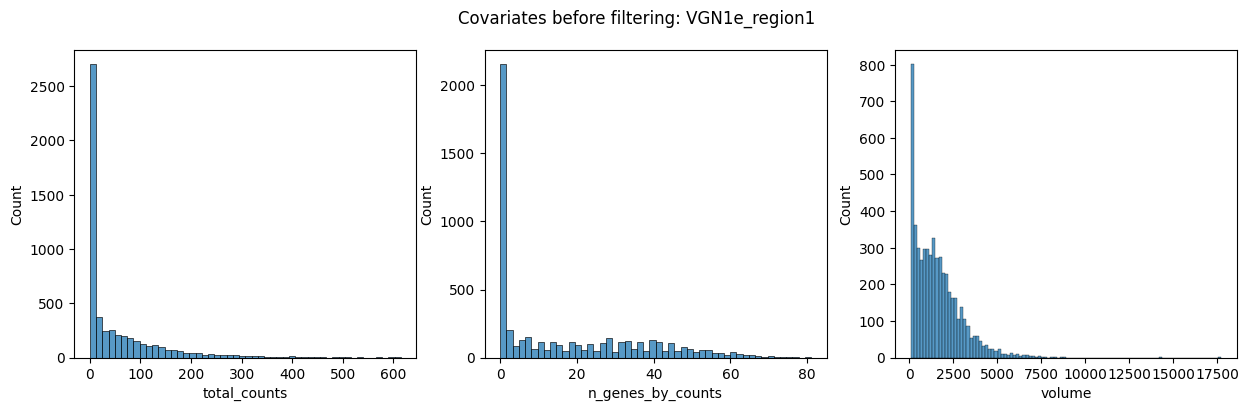

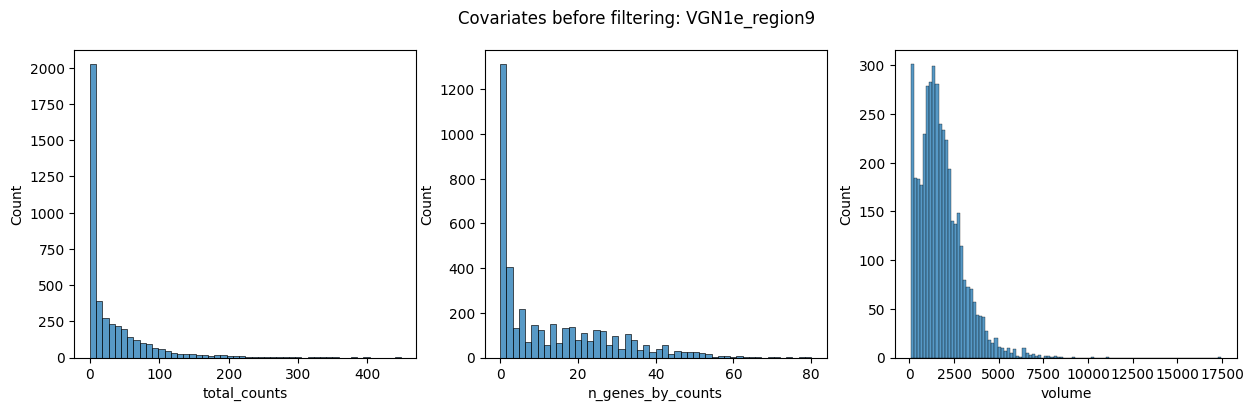

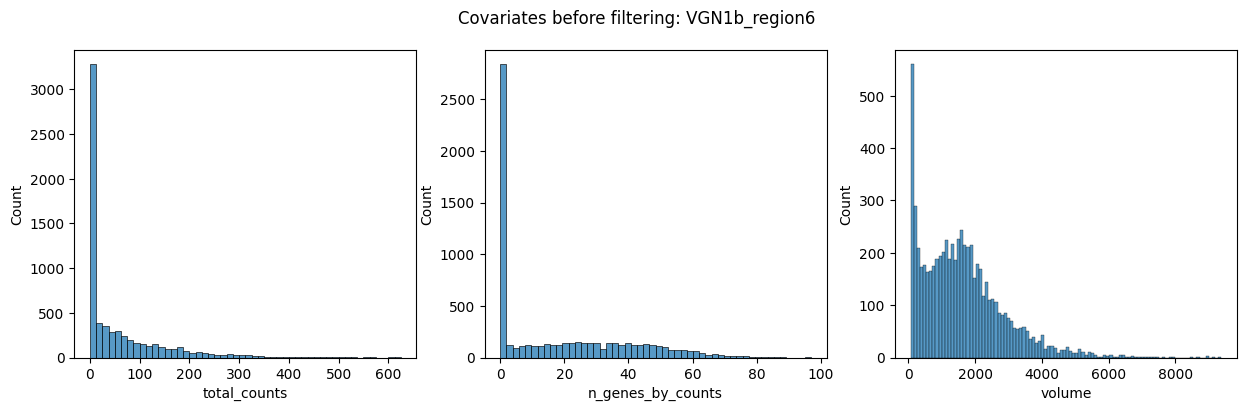

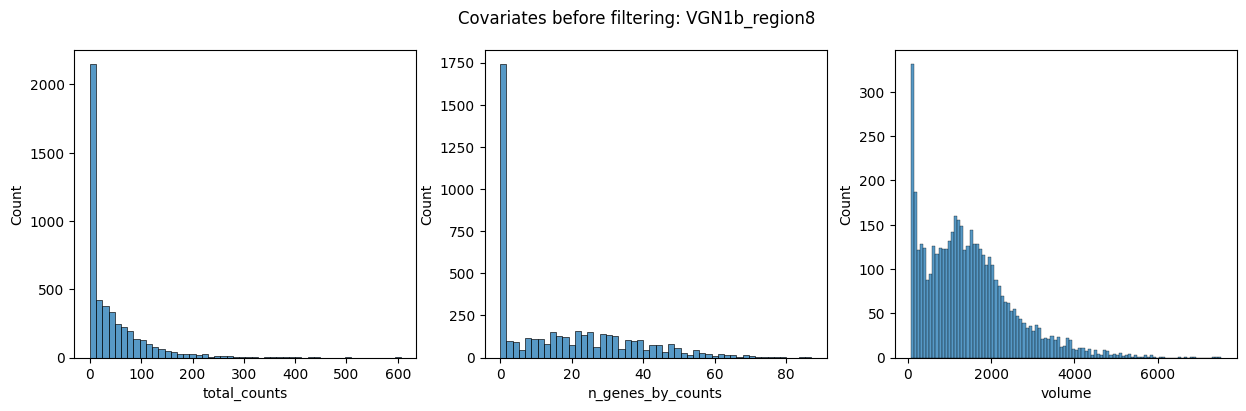

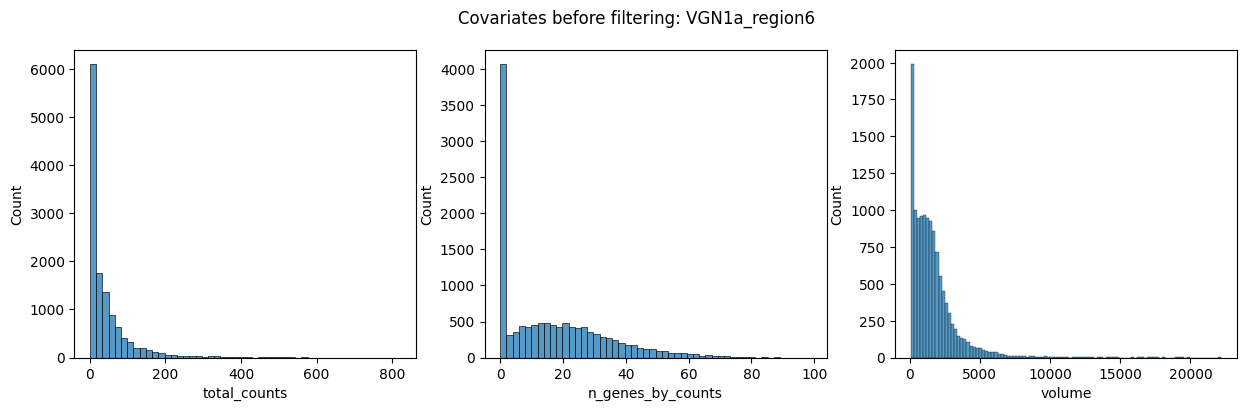

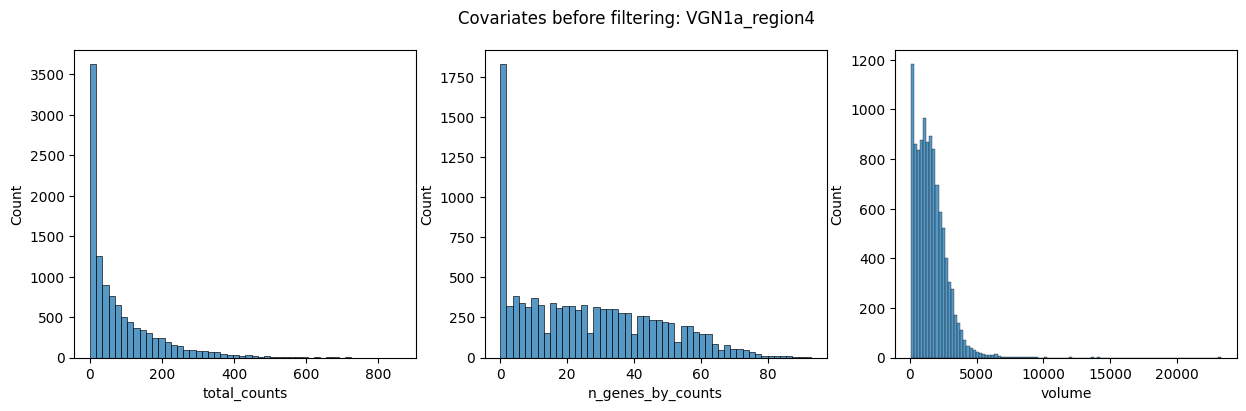

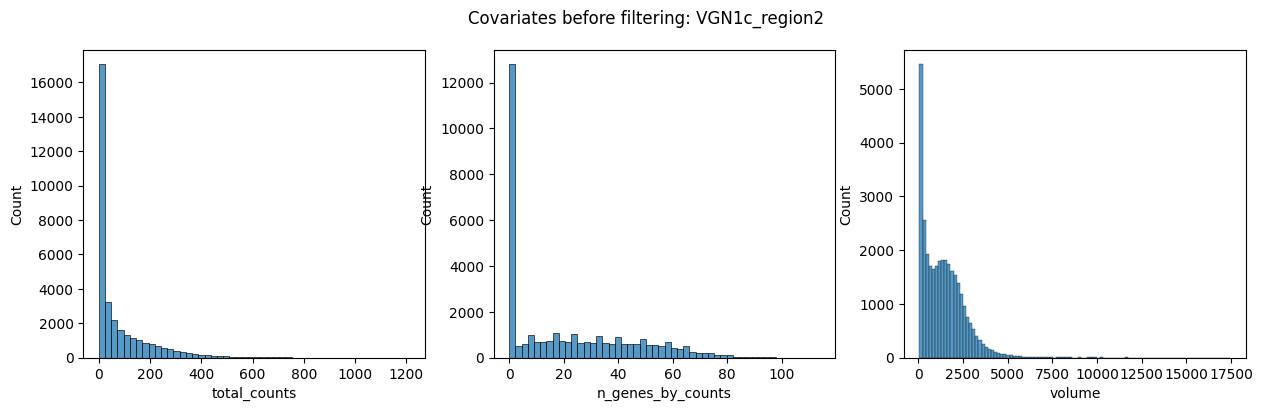

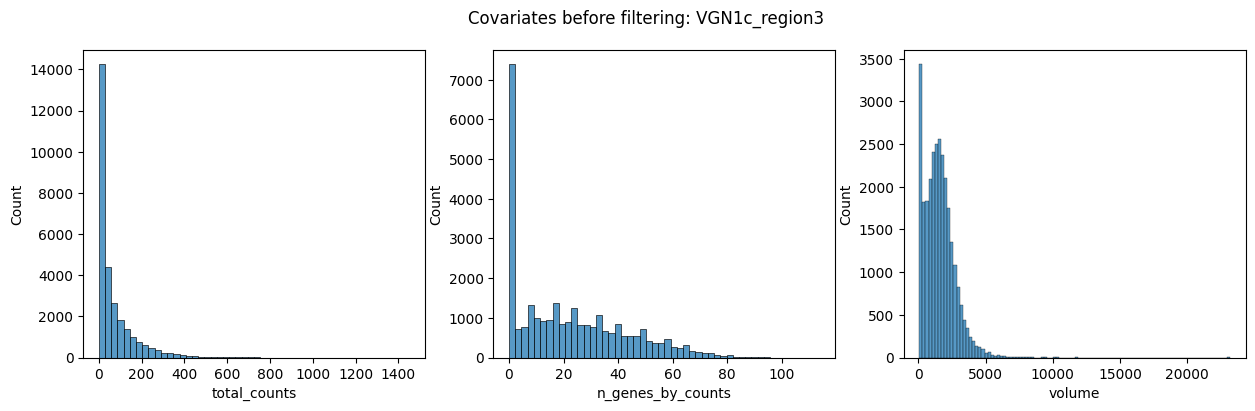

In [22]:
for name, adata in [
    ("VGN1e_region1", adata_VGN1e1),
    ("VGN1e_region9", adata_VGN1e9),
    ("VGN1b_region6", adata_VGN1b6),
    ("VGN1b_region8", adata_VGN1b8),    
    ("VGN1a_region6", adata_VGN1a6),
    ("VGN1a_region4", adata_VGN1a4),
    ("VGN1c_region2", adata_VGN1c2),
    ("VGN1c_region3", adata_VGN1c3)
]:
    fig, axs = plt.subplots(1, 3, figsize=(15, 4))
    fig.suptitle(f"Covariates before filtering: {name}")
    
    sns.histplot(
    adata.obs["total_counts"],
    kde=False,
    bins=50,
    ax=axs[0],
    )
    sns.histplot(
    adata.obs["n_genes_by_counts"],
    kde=False,
    bins=50,
    ax=axs[1],
    )
    sns.histplot(
    adata.obs["volume"],
    kde=False,
    bins=100,
    ax=axs[2],
    )

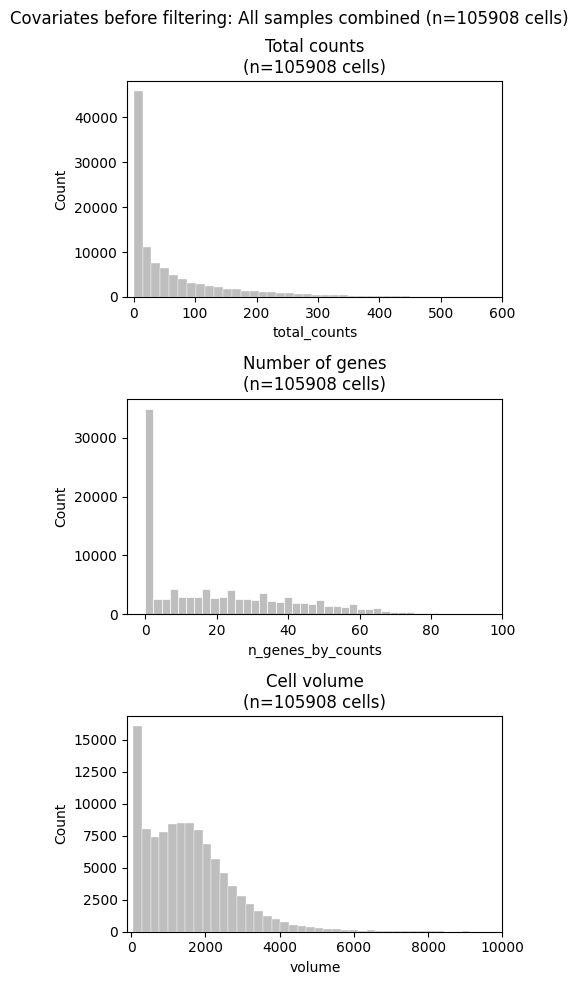

In [23]:
### all samples before filtering 

import scanpy as sc

# concatenate all samples
adata_combined = adata_VGN1a6.concatenate(
    adata_VGN1a4,
    adata_VGN1b6,
    adata_VGN1b8,
    adata_VGN1c2,
    adata_VGN1c3,
    adata_VGN1e1,
    adata_VGN1e9,
    batch_key=None  # remove batch labels if you don't care about them
)

# Find total number of cells
total_cells = adata_combined.n_obs  # n_obs gives the number of cells (rows)

fig, axs = plt.subplots(3, 1, figsize=(5, 10))
fig.suptitle(f"Covariates before filtering: All samples combined (n={total_cells} cells)")

sns.histplot(
    adata_combined.obs["total_counts"],
    kde=False,
    bins=100,
    ax=axs[0],
    color = 'darkgray',
    edgecolor="white"
)
axs[0].set_title(f"Total counts\n(n={total_cells} cells)")
axs[0].set_xlim(-10, 600)

sns.histplot(
    adata_combined.obs["n_genes_by_counts"],
    kde=False,
    bins=50,
    ax=axs[1],
    color = 'darkgray',
    edgecolor="white"
)
axs[1].set_title(f"Number of genes\n(n={total_cells} cells)")
axs[1].set_xlim(-5, 100)

sns.histplot(
    adata_combined.obs["volume"],
    kde=False,
    bins=100,
    ax=axs[2],
    color = 'darkgray',
    edgecolor="white"

)
axs[2].set_title(f"Cell volume\n(n={total_cells} cells)")
axs[2].set_xlim(-100, 10000)

plt.tight_layout()
plt.savefig('qc/figures/BeforeFiltering_Transcripts_Genes_Volume_PerCell.png', dpi = 600)
plt.show()

## display segmentation before filtering cells 

I want to plot the cell segmentation made by cellpose2 before I filter out cell artefacts

To do this I will first define two function- described in detail below 

In [24]:
def load_and_filter_segmentation(segmentation_path, cell_ids=None):
    """
    Load segmentation data and optionally filter by a list of cell IDs.

    Parameters:
        segmentation_path (str): Path to the segmentation .parquet file.
        cell_ids (list of str, optional): List of cell IDs to retain. If None, no filtering is done.

    Returns:
        GeoDataFrame: Filtered segmentation data as a GeoDataFrame.
    """
    # Load segmentation data
    segmentation_df = gpd.read_parquet(segmentation_path)
    segmentation_df['EntityID'] = segmentation_df['EntityID'].astype(str).str.strip()

    # Optional filtering by cell IDs
    if cell_ids is not None:
        cell_ids = [str(cid).strip() for cid in cell_ids]
        segmentation_df = segmentation_df[segmentation_df['EntityID'].isin(cell_ids)]

    return gpd.GeoDataFrame(segmentation_df, geometry='Geometry')



def plot_rotated_segmentation_map(
    segmentation_gdf,
    angle,
    fill_color='gray',
    edge_color='black',
    xlim=None,
    ylim=None,
    scale_bar_length=None,
    scale_bar_x_start=None,
    scale_bar_y_start=None,
    linewidth=0.5,
    show_axis_ticks=False,
    dpi=300,
    save_path=None,
    save_figure=False
):
    """
    Plot rotated segmentation geometries.

    Parameters:
        segmentation_gdf (GeoDataFrame): GeoDataFrame with 'Geometry' column.
        angle (float): Rotation angle in degrees (counterclockwise).
        fill_color (str): Fill color of segmentations.
        edge_color (str): Border color of segmentations.
        xlim, ylim (tuple): Axis limits.
        scale_bar_*: Scale bar positioning and size.
        linewidth (float): Line thickness for polygon edges.
        show_axis_ticks (bool): Whether to display axis ticks.
        dpi (int): DPI for saving.
        save_path (str): File path to save the plot.
        save_figure (bool): Whether to save the figure.
    """
    # Compute rotation matrix
    radians = math.radians(angle)
    cos_angle = math.cos(radians)
    sin_angle = math.sin(radians)
    rotation_matrix = np.array([[cos_angle, -sin_angle], [sin_angle, cos_angle]])

    # Compute centroid for rotation center
    center_x = segmentation_gdf['Geometry'].centroid.x.mean()
    center_y = segmentation_gdf['Geometry'].centroid.y.mean()

    # Rotate and create patches
    rotated_patches = []
    for geom in segmentation_gdf['Geometry']:
        if isinstance(geom, MultiPolygon):
            polygons = geom.geoms
        elif isinstance(geom, Polygon):
            polygons = [geom]
        else:
            continue

        for poly in polygons:
            coords = np.array(poly.exterior.coords)
            centered = coords - [center_x, center_y]
            rotated = np.dot(centered, rotation_matrix) + [center_x, center_y]
            patch = MplPolygon(rotated, closed=True, facecolor=fill_color, edgecolor=edge_color, linewidth=linewidth)
            rotated_patches.append(patch)

    # Plotting
    fig, ax = plt.subplots(figsize=(10, 10))
    collection = PatchCollection(rotated_patches, match_original=True)
    ax.add_collection(collection)

    if xlim:
        ax.set_xlim(xlim)
    if ylim:
        ax.set_ylim(ylim)
    ax.set_aspect('equal')

    if not show_axis_ticks:
        ax.set_xticks([])
        ax.set_yticks([])

    # Draw scale bar if specified
    if scale_bar_length and scale_bar_x_start is not None and scale_bar_y_start is not None:
        ax.hlines(scale_bar_y_start,
                  scale_bar_x_start,
                  scale_bar_x_start + scale_bar_length,
                  colors='black', linewidth=3)

    plt.tight_layout()
    if save_figure and save_path:
        plt.savefig(save_path, dpi=dpi, bbox_inches='tight', format='png', transparent=True)
    plt.show()


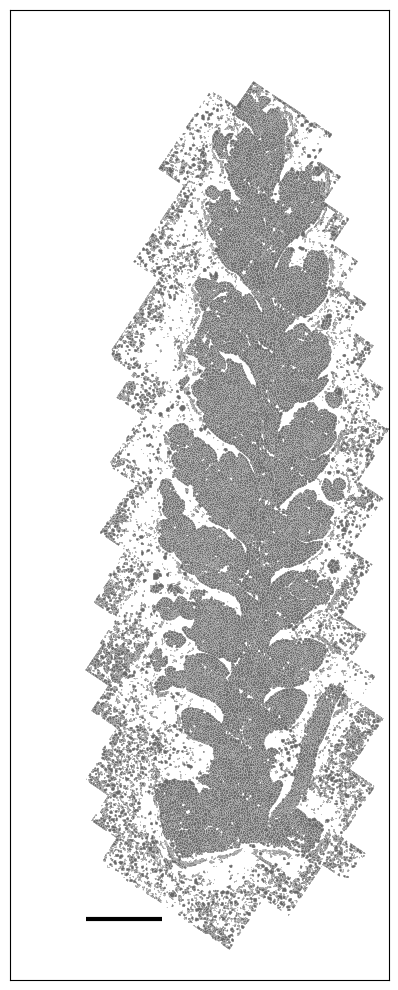

In [28]:
seg_gdf = load_and_filter_segmentation("cell_segmentation/VGN1c_region2_output/cellpose2_micron_space_VGN1c2.parquet")
plot_rotated_segmentation_map(
    segmentation_gdf=seg_gdf,
    angle=124,
    fill_color='dimgray',
    edge_color='white',
    linewidth=0.1,
    xlim = (3000, 5500),
    ylim = (1600, 8000),
    scale_bar_length=500,
    scale_bar_x_start = 3500,
    scale_bar_y_start = 2000,
    show_axis_ticks=False, 
    save_figure=True,
    save_path = 'qc/figures/VGN1c2_segmentation_beforefiltering.png'
)

# filter data by minimum counts per cell and cell volume 

In [6]:
#for each sample, filter cells so if there are less than 25 counts in the cell, it gets filtered out from dataset
sc.pp.filter_cells(adata_VGN1a6, min_counts=25)
sc.pp.filter_cells(adata_VGN1a4, min_counts=25)
sc.pp.filter_cells(adata_VGN1b6, min_counts=25)
sc.pp.filter_cells(adata_VGN1b8, min_counts=25)
sc.pp.filter_cells(adata_VGN1c2, min_counts=25)
sc.pp.filter_cells(adata_VGN1c3, min_counts=25)
sc.pp.filter_cells(adata_VGN1e1, min_counts=25)
sc.pp.filter_cells(adata_VGN1e9, min_counts=25)

#Filter cells out by cell volume, kept the same per sample 
# Filter adata_VGN1a6
adata_VGN1a6 = adata_VGN1a6[adata_VGN1a6.obs['volume'] > 500]
adata_VGN1a6 = adata_VGN1a6[adata_VGN1a6.obs['volume'] < 10000]
# Filter adata_VGN1a4
adata_VGN1a4 = adata_VGN1a4[adata_VGN1a4.obs['volume'] > 500]
adata_VGN1a4 = adata_VGN1a4[adata_VGN1a4.obs['volume'] < 10000]

# Filter adata_VGN1b6
adata_VGN1b6 = adata_VGN1b6[adata_VGN1b6.obs['volume'] > 500]
adata_VGN1b6 = adata_VGN1b6[adata_VGN1b6.obs['volume'] < 10000]
# Filter adata_VGN1b8
adata_VGN1b8 = adata_VGN1b8[adata_VGN1b8.obs['volume'] > 500]
adata_VGN1b8 = adata_VGN1b8[adata_VGN1b8.obs['volume'] < 10000]

# Filter adata_VGN1e1
adata_VGN1e1 = adata_VGN1e1[adata_VGN1e1.obs['volume'] > 500]
adata_VGN1e1 = adata_VGN1e1[adata_VGN1e1.obs['volume'] < 10000]
# Filter adata_VGN1e9
adata_VGN1e9 = adata_VGN1e9[adata_VGN1e9.obs['volume'] > 500]
adata_VGN1e9 = adata_VGN1e9[adata_VGN1e9.obs['volume'] < 10000]

# Filter adata_VGN1c2
adata_VGN1c2 = adata_VGN1c2[adata_VGN1c2.obs['volume'] > 500]
adata_VGN1c2 = adata_VGN1c2[adata_VGN1c2.obs['volume'] < 10000]
# Filter adata_VGN1c3
adata_VGN1c3 = adata_VGN1c3[adata_VGN1c3.obs['volume'] > 500]
adata_VGN1c3 = adata_VGN1c3[adata_VGN1c3.obs['volume'] < 10000]

# List of datasets
dataset = [adata_VGN1a6, adata_VGN1a4, adata_VGN1b6, adata_VGN1b8, adata_VGN1e1, adata_VGN1e9, adata_VGN1c2, adata_VGN1c3]


## how many filtered cells are captured per sample? 

In [30]:
adata_list = [
    (adata_VGN1a6, "VGN1a6"),
    (adata_VGN1a4, "VGN1a4"),
    (adata_VGN1b6, "VGN1b6"),
    (adata_VGN1b8, "VGN1b8"),
    (adata_VGN1c2, "VGN1c2"),
    (adata_VGN1c3, "VGN1c3"),
    (adata_VGN1e1, "VGN1e1"),
    (adata_VGN1e9, "VGN1e9")
]

# Print the number of cells in each AnnData object and the total number of cells
cell_counts = {}  # Dictionary to store cell counts
for adata, sample_name in adata_list:
    num_cells = adata.n_obs
    cell_counts[sample_name] = num_cells
    print(f"{sample_name}: {num_cells} cells")

# Calculate and print the total number of cells
total_cells = sum(cell_counts.values())
print(f"Total cells: {total_cells}")

VGN1a6: 5405 cells
VGN1a4: 6385 cells
VGN1b6: 2896 cells
VGN1b8: 2107 cells
VGN1c2: 15185 cells
VGN1c3: 14975 cells
VGN1e1: 2209 cells
VGN1e9: 1569 cells
Total cells: 50731


### Creating summary file for Gene x Cell information 
I need columns: Cell ID, cell size, cell coordinate, sample ID, number of genes, number of transcript counts, read counts per transcript id

In [7]:
# Function to create a summary matrix for a single AnnData object
def create_summary_matrix(adata, sample_name):
    # Work on a copy to ensure the original AnnData is not modified
    adata_copy = adata.copy()

    # Extract gene expression data as a DataFrame
    gene_expression_df = pd.DataFrame(
        adata_copy.X.toarray(),  # Convert sparse matrix to dense
        columns=adata_copy.var.index,  # Use gene names from adata.var as column names
        index=adata_copy.obs.index  # Align rows with EntityID
    )
    gene_expression_df.reset_index(inplace=True)
    gene_expression_df.rename(columns={'index': 'EntityID'}, inplace=True)

    # Extract required metadata
    metadata_df = pd.DataFrame({
        'EntityID': adata_copy.obs.index,  # Use the original index as EntityID
        'cell_size': adata_copy.obs['volume'],  # Assuming 'volume' represents cell size
        'cell_coordinate': adata_copy.obsm['spatial'].tolist(),  # Extract spatial coordinates
        'sample_ID': sample_name,  # Dynamically set the sample ID
        'n_genes': (adata_copy.X > 0).sum(axis=1).A1,  # Count of genes with nonzero expression
        'n_transcripts': adata_copy.X.sum(axis=1).A1  # Sum of transcript counts
    })

    # Merge metadata and gene expression data on EntityID
    summary_df = pd.merge(metadata_df, gene_expression_df, on='EntityID', how='inner')

    # Check if 'blank_genes' exists in obsm and append it at the end
    if 'blank_genes' in adata_copy.obsm:
        blank_genes_df = pd.DataFrame(
            adata_copy.obsm['blank_genes'],
            index=adata_copy.obs.index
        ).reset_index().rename(columns={'index': 'EntityID'})
        # Merge blank_genes at the end
        summary_df = pd.merge(summary_df, blank_genes_df, on='EntityID', how='left')

    return summary_df

# Function to create a combined summary matrix from a list of AnnData objects
def create_combined_summary(adata_list):
    summary_matrices = []
    
    for adata, sample_name in adata_list:
        # Apply the function to each AnnData object
        summary_matrix = create_summary_matrix(adata, sample_name)
        summary_matrices.append(summary_matrix)
    
    # Concatenate all summary matrices into one DataFrame
    combined_summary = pd.concat(summary_matrices, axis=0, ignore_index=True)
    return combined_summary

adata_list = [
    (adata_VGN1a6, "VGN1a6"),
    (adata_VGN1a4, "VGN1a4"),
    (adata_VGN1b6, "VGN1b6"),
    (adata_VGN1b8, "VGN1b8"),
    (adata_VGN1c2, "VGN1c2"),
    (adata_VGN1c3, "VGN1c3"),
    (adata_VGN1e1, "VGN1e1"),
    (adata_VGN1e9, "VGN1e9")
]

# Create the combined summary DataFrame
combined_cells_summary_matrix = create_combined_summary(adata_list)

# Save the updated summary matrix if needed
combined_cells_summary_matrix.to_csv("qc/cellmetadata_genecounts_transcriptcounts.csv", index=False)

# Display the combined DataFrame
combined_cells_summary_matrix


,EntityID,cell_size,cell_coordinate,sample_ID,n_genes,n_transcripts,TraesCS7D02G261600,TraesCS5A02G286800,TraesCS3A02G406500,TraesCS4D02G301100,...,Blank-5,Blank-6,Blank-7,Blank-8,Blank-9,Blank-10,Blank-11,Blank-12,Blank-13,Blank-14
0,2305551000002100247,3129.051505,"[753.8307102919142, 5158.756237593706]",VGN1a6,24,35.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2305551000002100249,3508.658404,"[725.3265387285265, 5162.490493706063]",VGN1a6,23,31.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2305551000002100250,3320.631586,"[741.9244976347301, 5168.3144271405845]",VGN1a6,35,64.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2305551000002100262,2125.011650,"[637.3960517107688, 5177.9738772537485]",VGN1a6,22,34.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2305551000002100268,2644.048521,"[722.5628097800374, 5180.919125612564]",VGN1a6,39,111.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50726,2655507000138100169,2344.095418,"[7370.38343163406, 9519.253952627134]",VGN1e9,28,73.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50727,2655507000138100170,1086.896905,"[7295.2316793203345, 9520.9743443319]",VGN1e9,25,40.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50728,2655507000138100176,2981.969112,"[7355.980970029536, 9536.959938361191]",VGN1e9,25,48.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50729,2655507000138100177,2414.194626,"[7328.525024458672, 9535.781547571658]",VGN1e9,28,102.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### show distribution of total transcript coutns, genes per cell, and cell volume after filtering (per sample and combined samples) 

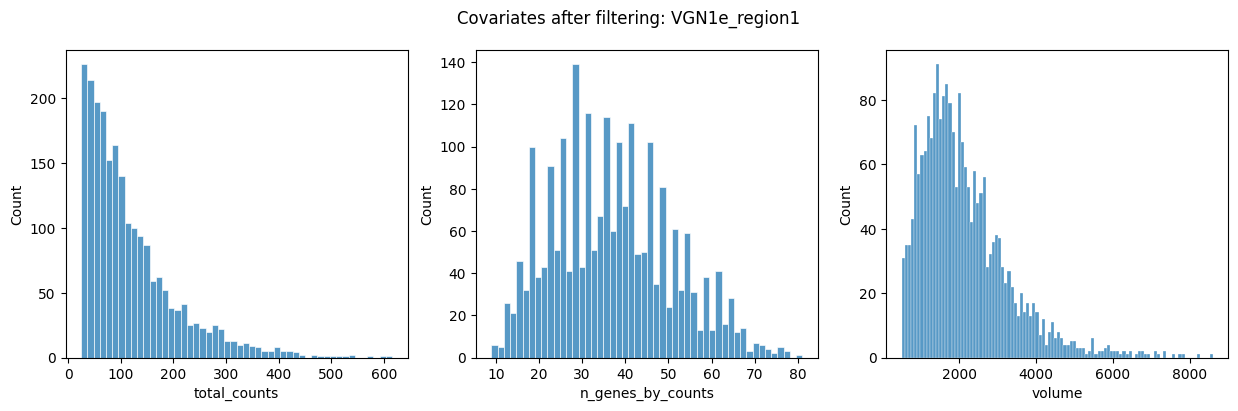

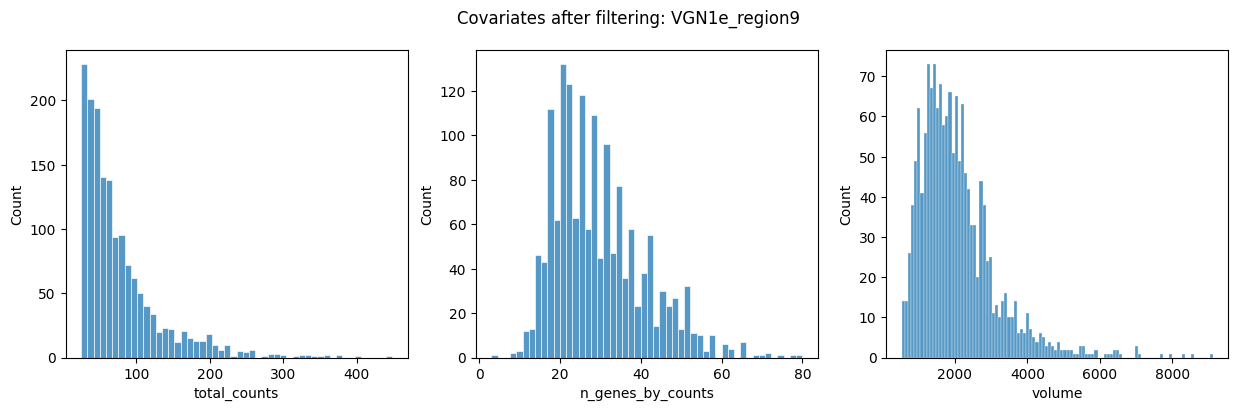

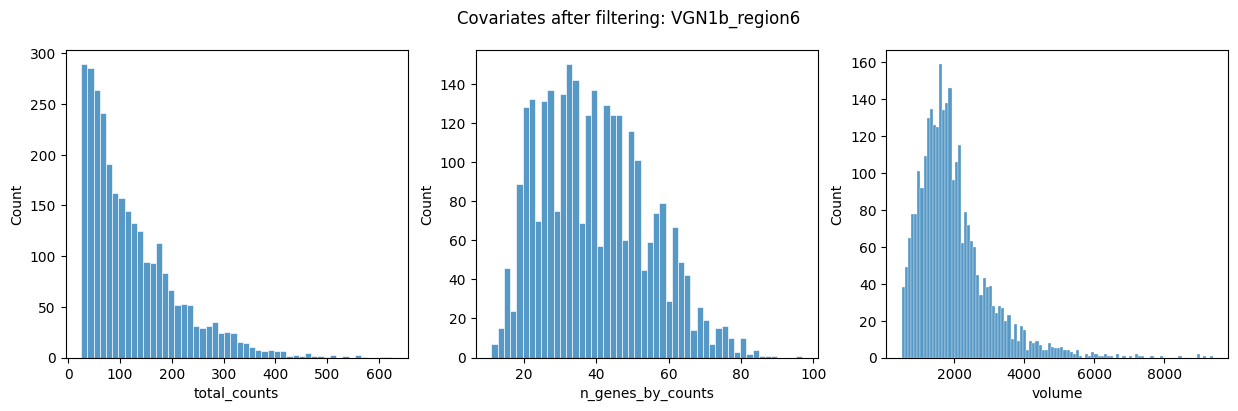

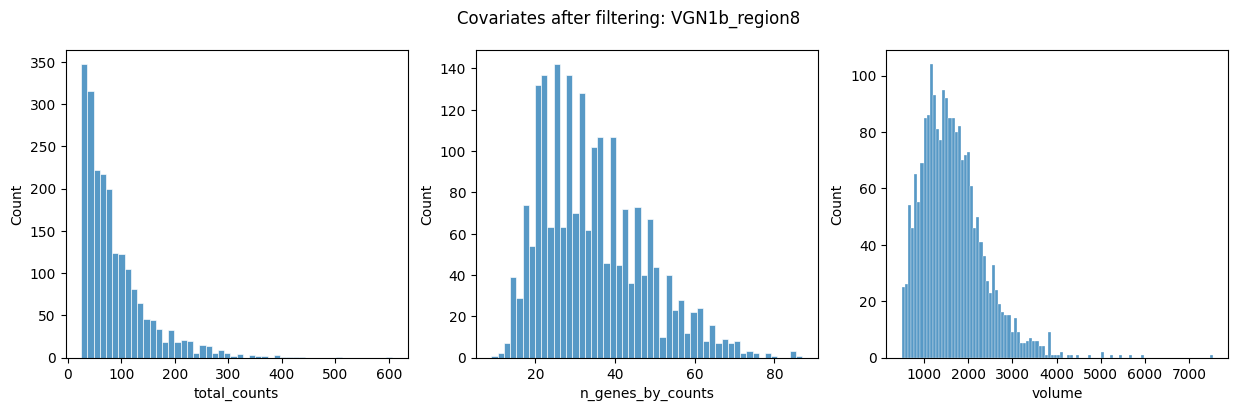

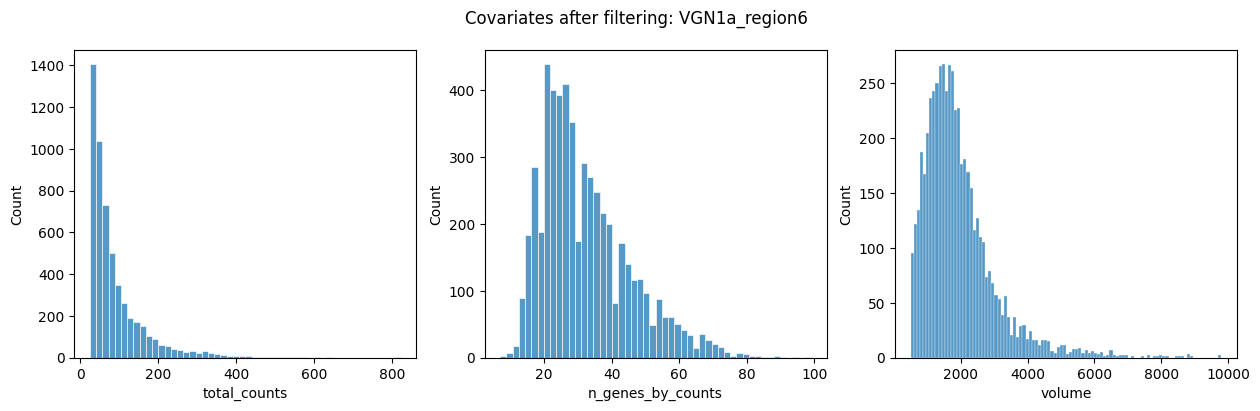

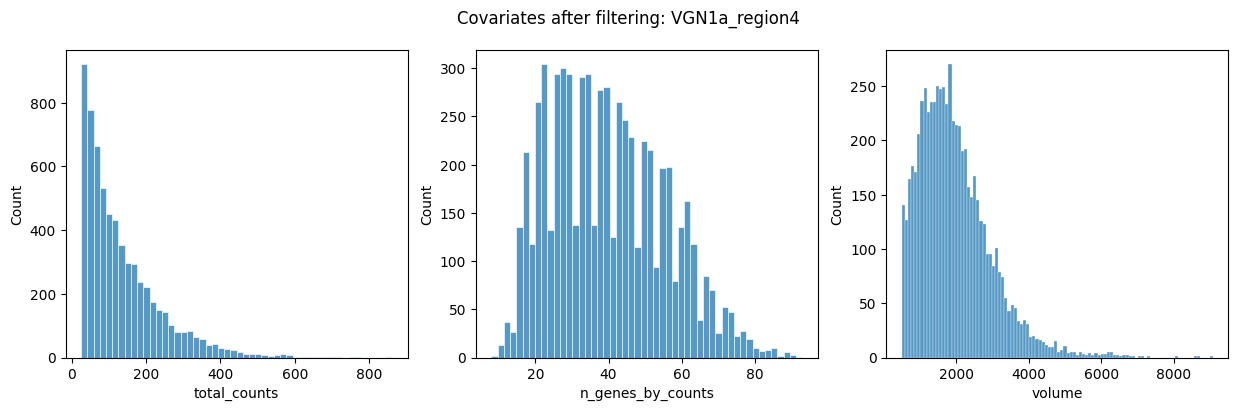

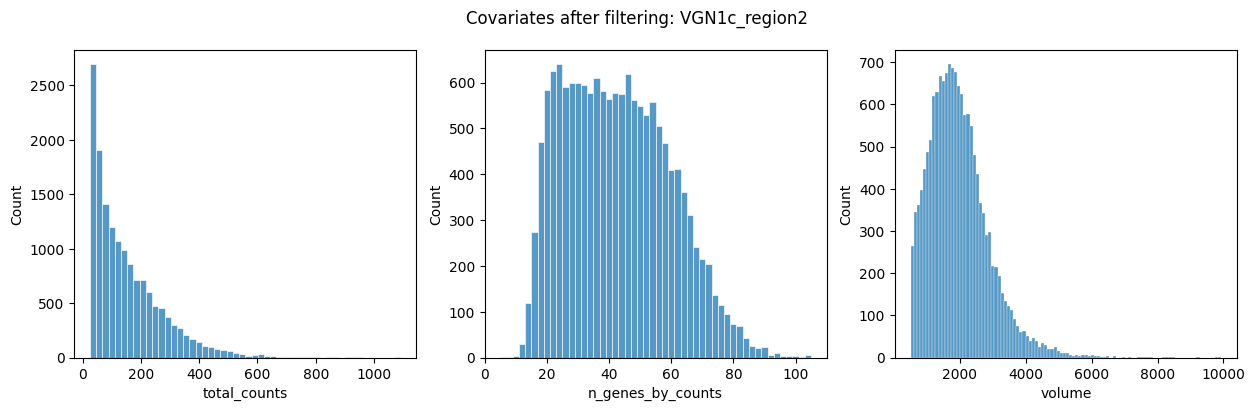

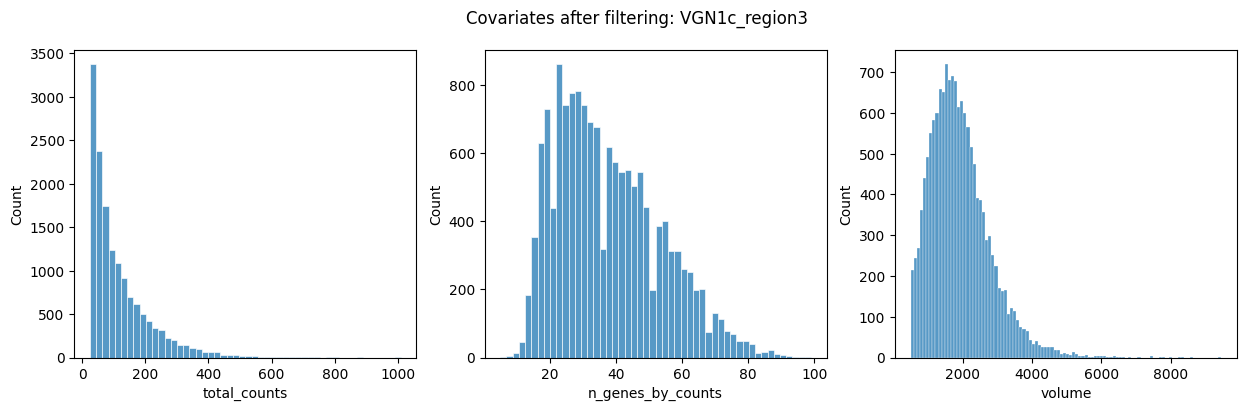

In [31]:
for name, adata in [
    ("VGN1e_region1", adata_VGN1e1),
    ("VGN1e_region9", adata_VGN1e9),
    ("VGN1b_region6", adata_VGN1b6),
    ("VGN1b_region8", adata_VGN1b8),    
    ("VGN1a_region6", adata_VGN1a6),
    ("VGN1a_region4", adata_VGN1a4),
    ("VGN1c_region2", adata_VGN1c2),
    ("VGN1c_region3", adata_VGN1c3)
]:
    fig, axs = plt.subplots(1, 3, figsize=(15, 4))
    fig.suptitle(f"Covariates after filtering: {name}")
    
    sns.histplot(
    adata.obs["total_counts"],
    kde=False,
    bins=50,
    ax=axs[0],
    edgecolor = 'white'
    )
    sns.histplot(
    adata.obs["n_genes_by_counts"],
    kde=False,
    bins=50,
    ax=axs[1],
    edgecolor = 'white'
    )
    sns.histplot(
    adata.obs["volume"],
    kde=False,
    bins=100,
    ax=axs[2],
    edgecolor = 'white'
    )

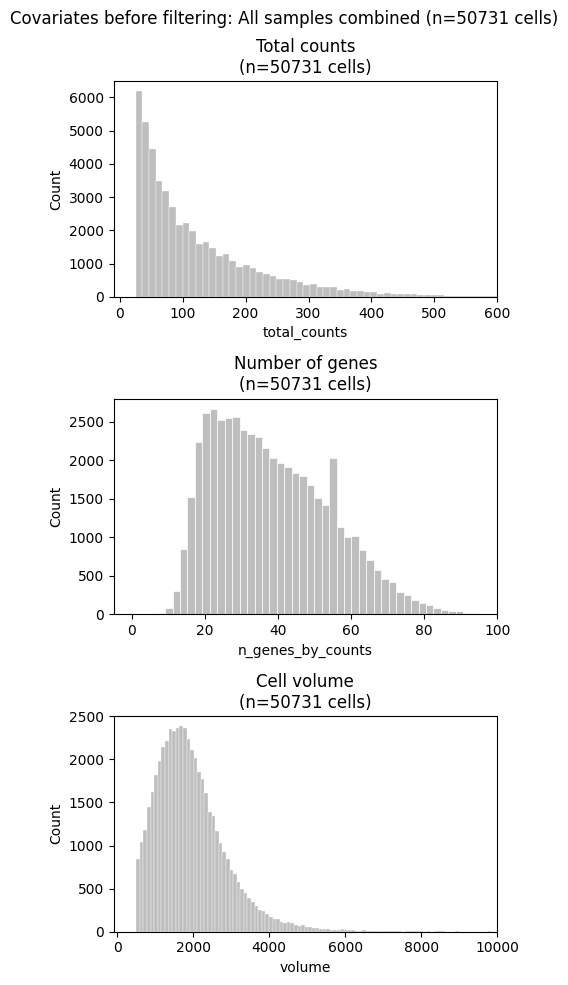

In [33]:
### all samples before filtering 

import scanpy as sc

# concatenate all samples
adata_combined = adata_VGN1a6.concatenate(
    adata_VGN1a4,
    adata_VGN1b6,
    adata_VGN1b8,
    adata_VGN1c2,
    adata_VGN1c3,
    adata_VGN1e1,
    adata_VGN1e9,
    batch_key=None  # remove batch labels if you don't care about them
)

# Find total number of cells
total_cells = adata_combined.n_obs  # n_obs gives the number of cells (rows)

fig, axs = plt.subplots(3, 1, figsize=(5, 10))
fig.suptitle(f"Covariates before filtering: All samples combined (n={total_cells} cells)")

sns.histplot(
    adata_combined.obs["total_counts"],
    kde=False,
    bins=100,
    ax=axs[0],
    color="darkgray",
    edgecolor="white"
)
axs[0].set_title(f"Total counts\n(n={total_cells} cells)")
axs[0].set_xlim(-10, 600)

sns.histplot(
    adata_combined.obs["n_genes_by_counts"],
    kde=False,
    bins=50,
    ax=axs[1],
    color="darkgray",
    edgecolor="white"
)
axs[1].set_title(f"Number of genes\n(n={total_cells} cells)")
axs[1].set_xlim(-5, 100)

sns.histplot(
    adata_combined.obs["volume"],
    kde=False,
    bins=100,
    ax=axs[2],
    color="darkgray",
    edgecolor="white"

)
axs[2].set_title(f"Cell volume\n(n={total_cells} cells)")
axs[2].set_xlim(-100, 10000)

plt.savefig('qc/figures/AfterFiltering_Transcripts_Genes_Volume_PerCell.png', dpi = 600)
plt.tight_layout()
plt.show()

### show transcripts per cell distribution in each cell 

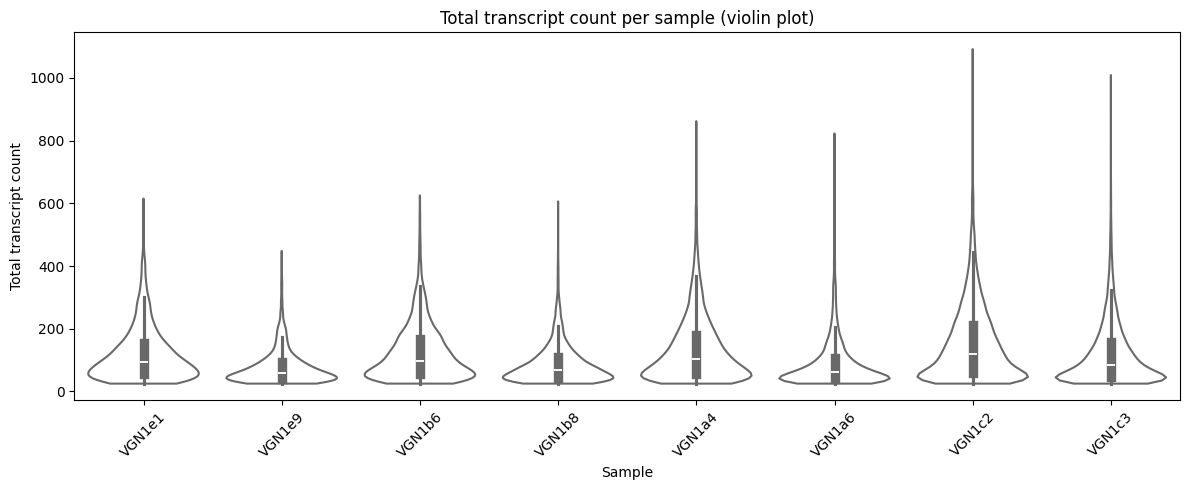

In [34]:
import scipy.sparse
# Define your adata objects and sample names
samples = {
    'VGN1c2': adata_VGN1c2,
    'VGN1c3': adata_VGN1c3,
    'VGN1a6': adata_VGN1a6,
    'VGN1a4': adata_VGN1a4,
    'VGN1b6': adata_VGN1b6,
    'VGN1b8': adata_VGN1b8,
    'VGN1e1': adata_VGN1e1,
    'VGN1e9': adata_VGN1e9
}


# Initialize an empty list to store DataFrames for each sample
all_filtered_dfs = []

# Iterate through each sample
for sample_name, adata in samples.items():
    
    # Extract expression data
    expression_df = pd.DataFrame(
        adata.X.toarray() if isinstance(adata.X, scipy.sparse.spmatrix) else adata.X,
        index=adata.obs_names,
        columns=adata.var_names
    )
    
    # Sum gene expression values per row
    expression_df['total_transcript_count'] = expression_df.sum(axis=1)
    
    # Add sample information column
    expression_df['sample'] = sample_name
    
    # Append to list
    all_filtered_dfs.append(expression_df)

# Concatenate all filtered DataFrames into a single DataFrame
final_filtered_df = pd.concat(all_filtered_dfs)

final_filtered_df['gene_count_per_cell'] = (final_filtered_df
    .drop(columns=['total_transcript_count', 'sample'])
    .gt(0.0)    # checks where values > 0.0 (returns True/False)
    .sum(axis=1)  # sums across columns (True=1, False=0)
)


normalised_expression_data = final_filtered_df.copy()


## plot transcript count per cell 
desired_sample_order = ['VGN1e1', 'VGN1e9','VGN1b6', 'VGN1b8', 'VGN1a4', 'VGN1a6',  'VGN1c2', 'VGN1c3']  # <-- your custom order


plt.figure(figsize=(12, 5))
sns.violinplot(
    data=normalised_expression_data,
    x='sample',
    y='total_transcript_count',
    inner='box',       # show a boxplot inside the violin
    cut=0,
    order = desired_sample_order,
    scale='width', 
    color = 'dimgray',
    fill = False
)

plt.title("Total transcript count per sample (violin plot)")
plt.xlabel("Sample")
plt.ylabel("Total transcript count")
plt.xticks(rotation=45)  # rotate sample labels if needed
plt.tight_layout()

plt.savefig('qc/figures/BeforeNorm_TranscriptCount_PerCell_ViolinPlot.svg', dpi = 600)
plt.show()



### show cell segmentation after filtering 

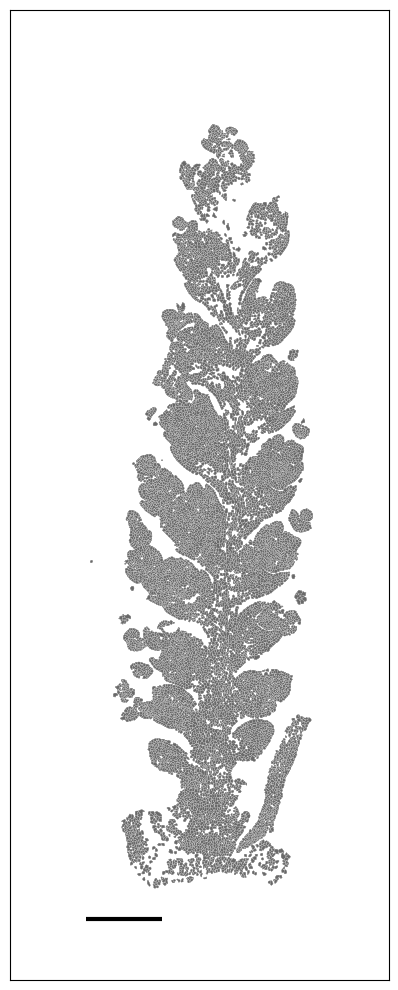

In [35]:
# Step 1: Extract cell IDs from AnnData object
adata_vis = adata_VGN1c2.copy()
adata_vis.obs.index = [index.split('-')[0] for index in adata_vis.obs.index]
adata_df = adata_vis.obs.reset_index().rename(columns={'index': 'cell_id'})
adata_df['cell_id'] = adata_df['cell_id'].astype(str).str.strip()
cell_ids = adata_df['cell_id'].tolist()

# Step 2: Load and filter segmentation
seg_gdf = load_and_filter_segmentation("cell_segmentation/VGN1c_region2_output/cellpose2_micron_space_VGN1c2.parquet", cell_ids=cell_ids)

plot_rotated_segmentation_map(
    segmentation_gdf=seg_gdf,
    angle=124,
    fill_color='dimgray',
    edge_color='white',
    linewidth=0.1,
    xlim = (3000, 5500),
    ylim = (1600, 8000),
    scale_bar_length=500,
    scale_bar_x_start = 3500,
    scale_bar_y_start = 2000,
    show_axis_ticks=False,
    save_figure=True,
    save_path = 'qc/figures/VGN1c2_segmentation_afterfiltering.png'
)

## Calculating information on average blanks per cell.

In [36]:
# Define a list of adata objects and sample names
samples = [
    (adata_VGN1a6, "VGN1a6"),
    (adata_VGN1a4, "VGN1a4"),
    (adata_VGN1b6, "VGN1b6"),
    (adata_VGN1b8, "VGN1b8"),
    (adata_VGN1c2, "VGN1c2"),
    (adata_VGN1c3, "VGN1c3"),
    (adata_VGN1e1, "VGN1e1"),
    (adata_VGN1e9, "VGN1e9")
]

# Initialize a list to store the QC data for each sample
qc_data = []

# Loop through each sample and calculate total_counts, blank_genes, and percentages
for adata, sample_name in samples:
    # Calculate total gene counts in filtered cells
    gene_counts = adata.X.sum() if not isinstance(adata.X, scipy.sparse.csr_matrix) else adata.X.sum()

    # Calculate total blank probe counts
    blank_probe_counts = adata.obsm["blank_genes"].to_numpy().sum()

    # Calculate combined total counts
    total_counts = gene_counts + blank_probe_counts

    # Calculate blank genes percentage
    blank_genes_percentage = (blank_probe_counts / total_counts) * 100

    # Calculate gene percentage
    gene_percentage = (gene_counts / total_counts) * 100

    # Calculate total counts per blank
    blank_counts = pd.DataFrame(
        adata.obsm["blank_genes"],
        index=adata.obs_names,
        columns=[f"Blank-{i}" for i in range(adata.obsm["blank_genes"].shape[1])]
    ).sum()

    # Append the results to the QC data list
    qc_data.append({
        'Sample': sample_name,
        'Total Counts (Including Blanks)': total_counts,
        'Blank Counts': blank_probe_counts,
        'Blank Percentage': blank_genes_percentage,
        'Gene Counts': gene_counts,
        'Gene Percentage': gene_percentage,
        **{f"{col}_Total Counts": val for col, val in blank_counts.items()}
    })

# Create a DataFrame from the qc_data list
qc_df = pd.DataFrame(qc_data)

# Calculate summary statistics for Blank Percentage
mean_blank_percentage = qc_df['Blank Percentage'].mean()
median_blank_percentage = qc_df['Blank Percentage'].median()
range_blank_percentage = qc_df['Blank Percentage'].max() - qc_df['Blank Percentage'].min()

# Print the QC summary statistics
print(f"Mean Blank Percentage: {mean_blank_percentage:.2f}%")
print(f"Median Blank Percentage: {median_blank_percentage:.2f}%")
print(f"Range of Blank Percentages: {range_blank_percentage:.2f}%")


# Display the QC DataFrame
qc_df.to_csv("qc/blankcounts_persample.csv", index=False)

qc_df

Mean Blank Percentage: 0.28%
Median Blank Percentage: 0.27%
Range of Blank Percentages: 0.10%


,Sample,Total Counts (Including Blanks),Blank Counts,Blank Percentage,Gene Counts,Gene Percentage,Blank-0_Total Counts,Blank-1_Total Counts,Blank-2_Total Counts,Blank-3_Total Counts,...,Blank-5_Total Counts,Blank-6_Total Counts,Blank-7_Total Counts,Blank-8_Total Counts,Blank-9_Total Counts,Blank-10_Total Counts,Blank-11_Total Counts,Blank-12_Total Counts,Blank-13_Total Counts,Blank-14_Total Counts
0,VGN1a6,478986.0,1270.0,0.265143,477716.0,99.734855,193.0,60.0,70.0,75.0,...,78.0,41.0,32.0,131.0,88.0,49.0,58.0,7.0,19.0,334.0
1,VGN1a4,857615.0,2569.0,0.299552,855046.0,99.700451,479.0,125.0,186.0,130.0,...,193.0,52.0,41.0,185.0,132.0,95.0,86.0,22.0,40.0,689.0
2,VGN1b6,356417.0,973.0,0.272995,355444.0,99.727005,97.0,90.0,76.0,15.0,...,29.0,41.0,64.0,34.0,22.0,24.0,70.0,7.0,43.0,324.0
3,VGN1b8,184436.0,442.0,0.239650,183994.0,99.760348,38.0,44.0,21.0,10.0,...,13.0,32.0,47.0,15.0,11.0,14.0,34.0,6.0,9.0,129.0
4,VGN1c2,2320062.0,6115.0,0.263571,2313947.0,99.736428,723.0,444.0,711.0,147.0,...,199.0,204.0,272.0,516.0,169.0,522.0,653.0,79.0,202.0,1009.0
5,VGN1c3,1777816.0,5404.0,0.303968,1772412.0,99.696034,663.0,434.0,605.0,111.0,...,219.0,209.0,222.0,493.0,169.0,423.0,471.0,63.0,134.0,986.0
6,VGN1e1,262562.0,713.0,0.271555,261849.0,99.728447,90.0,74.0,78.0,10.0,...,27.0,45.0,76.0,45.0,16.0,50.0,26.0,13.0,8.0,120.0
7,VGN1e9,122641.0,418.0,0.340832,122223.0,99.659169,47.0,79.0,33.0,8.0,...,15.0,17.0,32.0,32.0,10.0,30.0,18.0,7.0,3.0,69.0


## what does transcript count distribution look like with in one tissue? 

I will use LDR spike to display this 

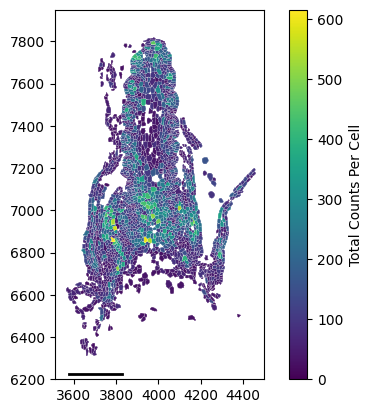

In [37]:
segmentation_df = gpd.read_parquet('cell_segmentation/VGN1e_region1_output/cellpose2_micron_space_VGN1e1.parquet')
transcripts_df = pd.read_csv('cell_segmentation/VGN1e_region1_output/detected_transcripts_VGN1e1.csv') 

# Filter to create a new AnnData object with only the sample 'VGN1e1' with my cluster information included
adata_VGN1e1_vis = adata_VGN1e1.copy()

adata_VGN1e1_vis.obs.index = [index.split('-')[0] for index in adata_VGN1e1_vis.obs.index]

# Convert adata_VGN1e1_vis.obs to a dataframe and reset the index to make the index a column
adata_VGN1e1_df = adata_VGN1e1_vis.obs.reset_index()

# Extract id for all cells in my VGN1e1 sample 
adata_VGN1e1_df = adata_VGN1e1_df.rename(columns={'index': 'cell_id'})
adata_VGN1e1_df['cell_id'] = adata_VGN1e1_df['cell_id'].astype(str).str.strip()
cell_ids = adata_VGN1e1_df['cell_id'].tolist()
cell_ids = [cell_id.strip() for cell_id in cell_ids]


# Convert EntityID in filtered_segmentation_df to strings to match with cell_ids
filtered_segmentation_df = segmentation_df.copy()
filtered_segmentation_df['EntityID'] = filtered_segmentation_df['EntityID'].astype(str)

# Now filter based on matching values in cell_ids
filtered_segmentation_df = filtered_segmentation_df[filtered_segmentation_df['EntityID'].isin(cell_ids)]

#now filter out transcripts that aren't in my cells to make things run faster
# Ensures that filtered_segmentation_df is a GeoDataFrame with geometries representing spatial areas (e.g., polygons).
filtered_segmentation_df = gpd.GeoDataFrame(filtered_segmentation_df, geometry='Geometry')

# Converts transcripts_df into a GeoDataFrame where each transcript is represented as a point geometry derived from its global_x and global_y coordinates.
transcripts_gdf = gpd.GeoDataFrame(
    transcripts_df,
    geometry=gpd.points_from_xy(transcripts_df['global_x'], transcripts_df['global_y'])
)

# Matches transcript points (transcripts_gdf) to spatial regions (filtered_segmentation_df) using a spatial join (predicate='within').
filtered_transcripts_gdf = gpd.sjoin(
    transcripts_gdf,
    filtered_segmentation_df[['EntityID', 'Geometry']],
    how='inner',
    predicate='within'
)

# Remove unnecessary columns and duplicates
filtered_transcripts_df = (
    filtered_transcripts_gdf
    .drop(columns=['index_right', 'Unnamed: 0'], errors='ignore')  # Drop join-related columns
    .drop_duplicates()  # Remove duplicate rows
)

# Reset the index for clarity
filtered_transcripts_df.reset_index(drop=True, inplace=True)

# grab the gene expression values from dataset
gene_expression_df = pd.DataFrame(
    adata_VGN1e1_vis.X.toarray() if hasattr(adata_VGN1e1_vis.X, 'toarray') else adata_VGN1e1_vis.X,
    index=adata_VGN1e1_vis.obs_names,
    columns=adata_VGN1e1_vis.var_names
)
gene_expression_df = gene_expression_df.reset_index().rename(columns={'index': 'EntityID'})
gene_expression_df['Total_Counts'] = gene_expression_df.drop(columns=['EntityID']).sum(axis=1)


#copy the filtered dataset
filtered_segmentation_df2 = filtered_segmentation_df.copy()

gene_expression_df['EntityID'] = gene_expression_df['EntityID'].astype(str)
filtered_segmentation_df2['EntityID'] = filtered_segmentation_df2['EntityID'].astype(str)

# Merge dataframes on 'EntityID', keeping only the necessary column
filtered_segmentation_df2 = filtered_segmentation_df2.merge(
    gene_expression_df[['EntityID', 'Total_Counts']],
    on='EntityID',
    how='left'
)

min_x = filtered_segmentation_df2['Geometry'].bounds.minx.min()
max_x = filtered_segmentation_df2['Geometry'].bounds.maxx.max()
min_y = filtered_segmentation_df2['Geometry'].bounds.miny.min()
max_y = filtered_segmentation_df2['Geometry'].bounds.maxy.max()

# Rotation logic
if 'Original_Geometry' not in filtered_segmentation_df2.columns:
    filtered_segmentation_df2['Original_Geometry'] = filtered_segmentation_df2['Geometry']

# Define rotation angle in degrees
rotation_angle = 22
angle_rad = np.radians(rotation_angle)

# Calculate the rotation matrix components
cos_theta = np.cos(angle_rad)
sin_theta = np.sin(angle_rad)

# Get the centroid of the entire sample as the rotation origin
centroid_x = (min_x + max_x) / 2  # Use the previously computed min_x, max_x
centroid_y = (min_y + max_y) / 2  # Use the previously computed min_y, max_y

# Rotation matrix for Shapely's affine_transform (a, b, d, e, xoff, yoff)
rotation_matrix = [
    cos_theta, -sin_theta,  # a, b
    sin_theta, cos_theta,   # d, e
    centroid_x - cos_theta * centroid_x + sin_theta * centroid_y,  # xoff
    centroid_y - sin_theta * centroid_x - cos_theta * centroid_y   # yoff
]

# Rotate the original geometries
rotated_geometries = filtered_segmentation_df2['Original_Geometry'].apply(
    lambda geom: affine_transform(geom, rotation_matrix)
)
filtered_segmentation_df2['Geometry'] = rotated_geometries

# Initialize colormap
colormap = cm.get_cmap('viridis')  # You can use other colormaps like 'plasma' or 'cividis'
norm = colors.Normalize(vmin=0, vmax=615.0)

# Plot the heatmap
fig, ax = plt.subplots()
patches_list = []

for _, row in filtered_segmentation_df2.iterrows():
    shape = row['Geometry']
    normalized_value = row['Total_Counts']
    color = colormap(norm(normalized_value))

    if isinstance(shape, MultiPolygon):
        for poly in shape.geoms:
            patch = patches.Polygon(
                list(poly.exterior.coords), closed=True, facecolor=color, edgecolor='white', linewidth=0.1
            )
            patches_list.append(patch)
    elif isinstance(shape, Polygon):
        patch = patches.Polygon(
            list(shape.exterior.coords), closed=True, facecolor=color, edgecolor='white', linewidth=0.1
        )
        patches_list.append(patch)

# Set axis limits
ax.set_ylim(6200, 7950)
ax.set_xlim(3510, 4500)
ax.set_aspect('equal')

# Use PatchCollection to handle all patches
collection = PatchCollection(patches_list, match_original=True)
ax.add_collection(collection)

# Add the scale bar
scale_bar_length_microns = 250 # Length of scale bar in microns
scale_bar_x_start = 3575      # X-coordinate for the start of the scale bar
scale_bar_y_start = 6225       # Y-coordinate for the start of the scale bar
scale_bar_length_units = scale_bar_length_microns  # Assuming 1 unit = 1 micron


scale_bar = Line2D(
    [scale_bar_x_start, scale_bar_x_start + scale_bar_length_microns],
    [scale_bar_y_start, scale_bar_y_start],
    color="black",
    linewidth=2
)
ax.add_line(scale_bar)

# Add colorbar
plt.colorbar(cm.ScalarMappable(norm=norm, cmap=colormap), ax=ax, label="Total Counts Per Cell")
ax.set_facecolor('white')
plt.savefig('qc/figures/TotalTranscriptsPerCell_BeforeNormalisation_LDR.png', dpi = 600)
plt.show()


In [38]:
max_value = filtered_segmentation_df2['Total_Counts'].max()
print("Maximum value of Total_Counts:", max_value)

Maximum value of Total_Counts: 615.0


## what are the mean and median counts for my QC metrics for each sample?  

In [39]:
# Create a list of AnnData objects and their corresponding sample names
adata_list = [
    (adata_VGN1a6, "VGN1a6"),
    (adata_VGN1a4, "VGN1a4"),
    (adata_VGN1b6, "VGN1b6"),
    (adata_VGN1b8, "VGN1b8"),
    (adata_VGN1c2, "VGN1c2"),
    (adata_VGN1c3, "VGN1c3"),
    (adata_VGN1e1, "VGN1e1"),
    (adata_VGN1e9, "VGN1e9")
]

# Initialize an empty list to store DataFrames
df_list = []

# Loop through the AnnData objects and create a combined DataFrame
for adata, sample_name in adata_list:
    # Extract the 'total_counts' and 'n_genes_by_counts' metrics from .obs
    df = adata.obs[['total_counts', 'n_genes_by_counts', 'volume']].copy()
    # Add a column for the sample name
    df['sample'] = sample_name
    # Append the DataFrame to the list
    df_list.append(df)

# Concatenate all DataFrames into a single DataFrame
combined_df = pd.concat(df_list)

In [40]:
# Function to calculate and print the statistics on volume, total counts, number genes by count for all samples
def calculate_and_print_stats(column_name, df):
    mean_value = df[column_name].mean()
    median_value = df[column_name].median()
    min_value = df[column_name].min()
    max_value = df[column_name].max()
    range_value = max_value - min_value
    
    print(f"Statistics for {column_name}:")
    print(f"Mean: {mean_value:.2f}")
    print(f"Median: {median_value:.2f}")
    print(f"Range: {range_value:.2f} (Min: {min_value:.2f}, Max: {max_value:.2f})\n")

# Calculate and print stats for total_counts
calculate_and_print_stats('total_counts', combined_df)

# Calculate and print stats for n_genes_by_counts
calculate_and_print_stats('n_genes_by_counts', combined_df)

# Calculate and print stats for volume
calculate_and_print_stats('volume', combined_df)


Statistics for total_counts:
Mean: 125.02
Median: 90.00
Range: 1067.00 (Min: 25.00, Max: 1092.00)

Statistics for n_genes_by_counts:
Mean: 38.33
Median: 36.00
Range: 102.00 (Min: 3.00, Max: 105.00)

Statistics for volume:
Mean: 1949.39
Median: 1792.57
Range: 9437.30 (Min: 500.01, Max: 9937.31)



In [41]:
### Function to calculate and print the stats for a given column per sample
def calculate_and_print_stats_by_sample(column_name, df):
    grouped_df = df.groupby('sample')
    
    for sample_name, group in grouped_df:
        mean_value = group[column_name].mean()
        median_value = group[column_name].median()
        min_value = group[column_name].min()
        max_value = group[column_name].max()
        range_value = max_value - min_value

        print(f"Statistics for {column_name} in sample {sample_name}:")
        print(f"Mean: {mean_value:.2f}")
        print(f"Median: {median_value:.2f}")

# Calculate and print stats for total_counts, grouped by sample
calculate_and_print_stats_by_sample('total_counts', combined_df)

# Calculate and print stats for n_genes_by_counts, grouped by sample
calculate_and_print_stats_by_sample('n_genes_by_counts', combined_df)


Statistics for total_counts in sample VGN1a4:
Mean: 133.91
Median: 103.00
Statistics for total_counts in sample VGN1a6:
Mean: 88.38
Median: 61.00
Statistics for total_counts in sample VGN1b6:
Mean: 122.74
Median: 97.50
Statistics for total_counts in sample VGN1b8:
Mean: 87.33
Median: 69.00
Statistics for total_counts in sample VGN1c2:
Mean: 152.38
Median: 118.00
Statistics for total_counts in sample VGN1c3:
Mean: 118.36
Median: 84.00
Statistics for total_counts in sample VGN1e1:
Mean: 118.54
Median: 93.00
Statistics for total_counts in sample VGN1e9:
Mean: 77.90
Median: 60.00
Statistics for n_genes_by_counts in sample VGN1a4:
Mean: 39.60
Median: 38.00
Statistics for n_genes_by_counts in sample VGN1a6:
Mean: 32.23
Median: 29.00
Statistics for n_genes_by_counts in sample VGN1b6:
Mean: 39.57
Median: 38.00
Statistics for n_genes_by_counts in sample VGN1b8:
Mean: 34.40
Median: 32.00
Statistics for n_genes_by_counts in sample VGN1c2:
Mean: 42.07
Median: 41.00
Statistics for n_genes_by_counts

### saving summary statistic of transcripts per cell and genes per cell to table 

In [43]:
# Function to calculate stats for a given column per sample and return a DataFrame
def calculate_stats_by_sample(column_name, df):
    stats_list = []
    grouped_df = df.groupby('sample')
    
    for sample_name, group in grouped_df:
        mean_value = group[column_name].mean()
        median_value = group[column_name].median()
        min_value = group[column_name].min()
        max_value = group[column_name].max()
        range_value = max_value - min_value

        # Append each sample's statistics as a dictionary to the list
        stats_list.append({
            'sample': sample_name,
            'column': column_name,
            'mean': mean_value,
            'median': median_value,
            'min': min_value,
            'max': max_value,
            'range': range_value
        })
    
    # Convert the list of dictionaries into a DataFrame
    stats_df = pd.DataFrame(stats_list)
    return stats_df

# Calculate stats for total_counts and n_genes_by_counts, and combine them
total_counts_stats_df = calculate_stats_by_sample('total_counts', combined_df)
n_genes_by_counts_stats_df = calculate_stats_by_sample('n_genes_by_counts', combined_df)

# Combine the stats for each column into a single DataFrame
combined_stats_df = pd.concat([total_counts_stats_df, n_genes_by_counts_stats_df])

# Save to an Excel or CSV file
combined_stats_df.to_excel('qc/transcriptcounts_genecounts_summarystatistics.xlsx', index=False) 
combined_stats_df

,sample,column,mean,median,min,max,range
0,VGN1a4,total_counts,133.914795,103.0,25.0,862.0,837.0
1,VGN1a6,total_counts,88.384087,61.0,25.0,823.0,798.0
2,VGN1b6,total_counts,122.736191,97.5,25.0,625.0,600.0
3,VGN1b8,total_counts,87.325104,69.0,25.0,606.0,581.0
4,VGN1c2,total_counts,152.383728,118.0,25.0,1092.0,1067.0
5,VGN1c3,total_counts,118.358063,84.0,25.0,1009.0,984.0
6,VGN1e1,total_counts,118.537346,93.0,25.0,615.0,590.0
7,VGN1e9,total_counts,77.898659,60.0,25.0,448.0,423.0
0,VGN1a4,n_genes_by_counts,39.603446,38.0,8.0,93.0,85.0
1,VGN1a6,n_genes_by_counts,32.228492,29.0,7.0,99.0,92.0


## Now we normalise the data with the following steps: 

1) sc.pp.normalise_total() normalises the counts so the total counts per cell are equivalent
2) sc.pp.log1p() applies the equation ln(1 + x)

These values replace the adata.X anndata object- so all counts are now adjusted by above two calculations

In [44]:
for adata in [
    adata_VGN1a6,
    adata_VGN1a4,
    adata_VGN1b6,
    adata_VGN1b8,
    adata_VGN1e1,
    adata_VGN1e9,
    adata_VGN1c2,
    adata_VGN1c3
]:
    sc.pp.normalize_total(adata, inplace=True) 
    # after normalisation the total counts in adata.X are scaled
    #obs['total_counts'] represents adjusted counts to sum the target across all genes
    sc.pp.log1p(adata) #ln(1 + X) applied to data, replaces adata.X to log-transformed values
    sc.pp.highly_variable_genes(adata, flavor="seurat", n_top_genes=10, inplace=True) #identifies most variable genes across dataset

## recalculate gene count per cell and transcript count per cell with my normalised values 

In [45]:
#normalised counts dataframe 

import scipy.sparse
# Define your adata objects and sample names
samples = {
    'VGN1c2': adata_VGN1c2,
    'VGN1c3': adata_VGN1c3,
    'VGN1a6': adata_VGN1a6,
    'VGN1a4': adata_VGN1a4,
    'VGN1b6': adata_VGN1b6,
    'VGN1b8': adata_VGN1b8,
    'VGN1e1': adata_VGN1e1,
    'VGN1e9': adata_VGN1e9
}


# Initialize an empty list to store DataFrames for each sample
all_filtered_dfs = []

# Iterate through each sample
for sample_name, adata in samples.items():
    
    # Extract expression data
    expression_df = pd.DataFrame(
        adata.X.toarray() if isinstance(adata.X, scipy.sparse.spmatrix) else adata.X,
        index=adata.obs_names,
        columns=adata.var_names
    )
    
    # Sum gene expression values per row
    expression_df['total_transcript_count'] = expression_df.sum(axis=1)
    
    # Add sample information column
    expression_df['sample'] = sample_name
    
    # Append to list
    all_filtered_dfs.append(expression_df)

# Concatenate all filtered DataFrames into a single DataFrame
final_filtered_df = pd.concat(all_filtered_dfs)

final_filtered_df['gene_count_per_cell'] = (final_filtered_df
    .drop(columns=['total_transcript_count', 'sample'])
    .gt(0.0)    # checks where values > 0.0 (returns True/False)
    .sum(axis=1)  # sums across columns (True=1, False=0)
)


normalised_expression_data = final_filtered_df.copy()

## plot QC metrics after normalisation for all samples (combined and per sample ) 

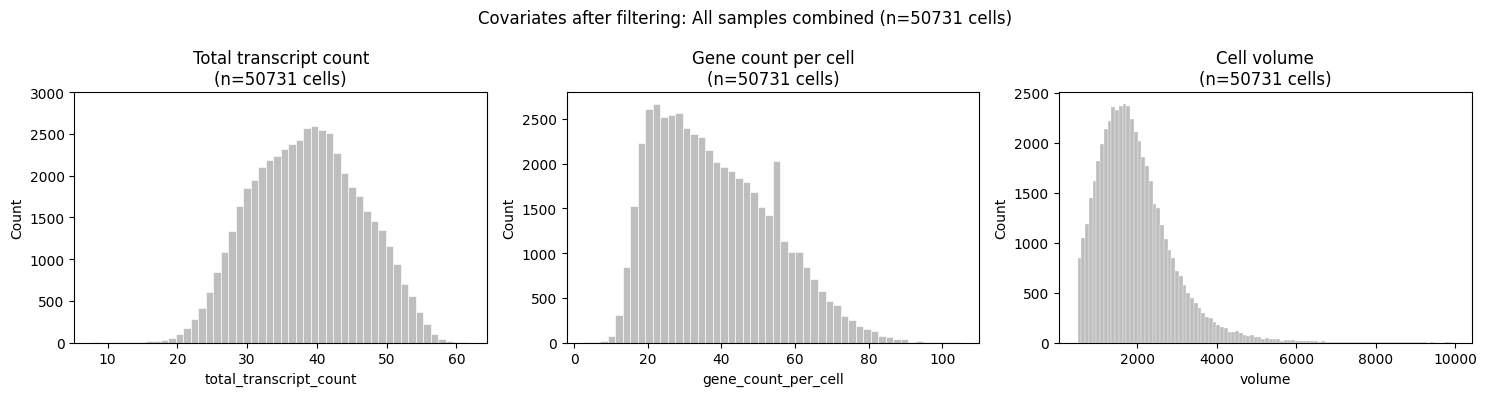

In [46]:
# concatenate all samples
adata_combined = adata_VGN1a6.concatenate(
    adata_VGN1a4,
    adata_VGN1b6,
    adata_VGN1b8,
    adata_VGN1c2,
    adata_VGN1c3,
    adata_VGN1e1,
    adata_VGN1e9,
    batch_key=None  # remove batch labels if you don't care about them
)

# Find total number of cells
total_cells = normalised_expression_data.shape[0]  # number of rows

fig, axs = plt.subplots(1, 3, figsize=(15, 4))
fig.suptitle(f"Covariates after filtering: All samples combined (n={total_cells} cells)")

# Plot total_transcript_count
sns.histplot(
    normalised_expression_data['total_transcript_count'],
    kde=False,
    bins=50,
    ax=axs[0],
    color = "darkgray",
    edgecolor="white"
)
axs[0].set_title(f"Total transcript count\n(n={total_cells} cells)")
axs[0].set_ylim(0, 3000)
# Plot gene_count_per_cell
sns.histplot(
    normalised_expression_data['gene_count_per_cell'],
    kde=False,
    bins=50,
    ax=axs[1],
    color = "darkgray",
    edgecolor="white"
)
axs[1].set_title(f"Gene count per cell\n(n={total_cells} cells)")

# Plot cell volume
sns.histplot(
    adata_combined.obs["volume"],
    kde=False,
    bins=100,
    ax=axs[2],
    color = "darkgray",
    edgecolor="white"
)
axs[2].set_title(f"Cell volume\n(n={total_cells} cells)")

plt.tight_layout()
plt.savefig('qc/figures/AfteNormalisation_Transcripts_Genes_Volume_PerCell.png', dpi = 600)
plt.show()


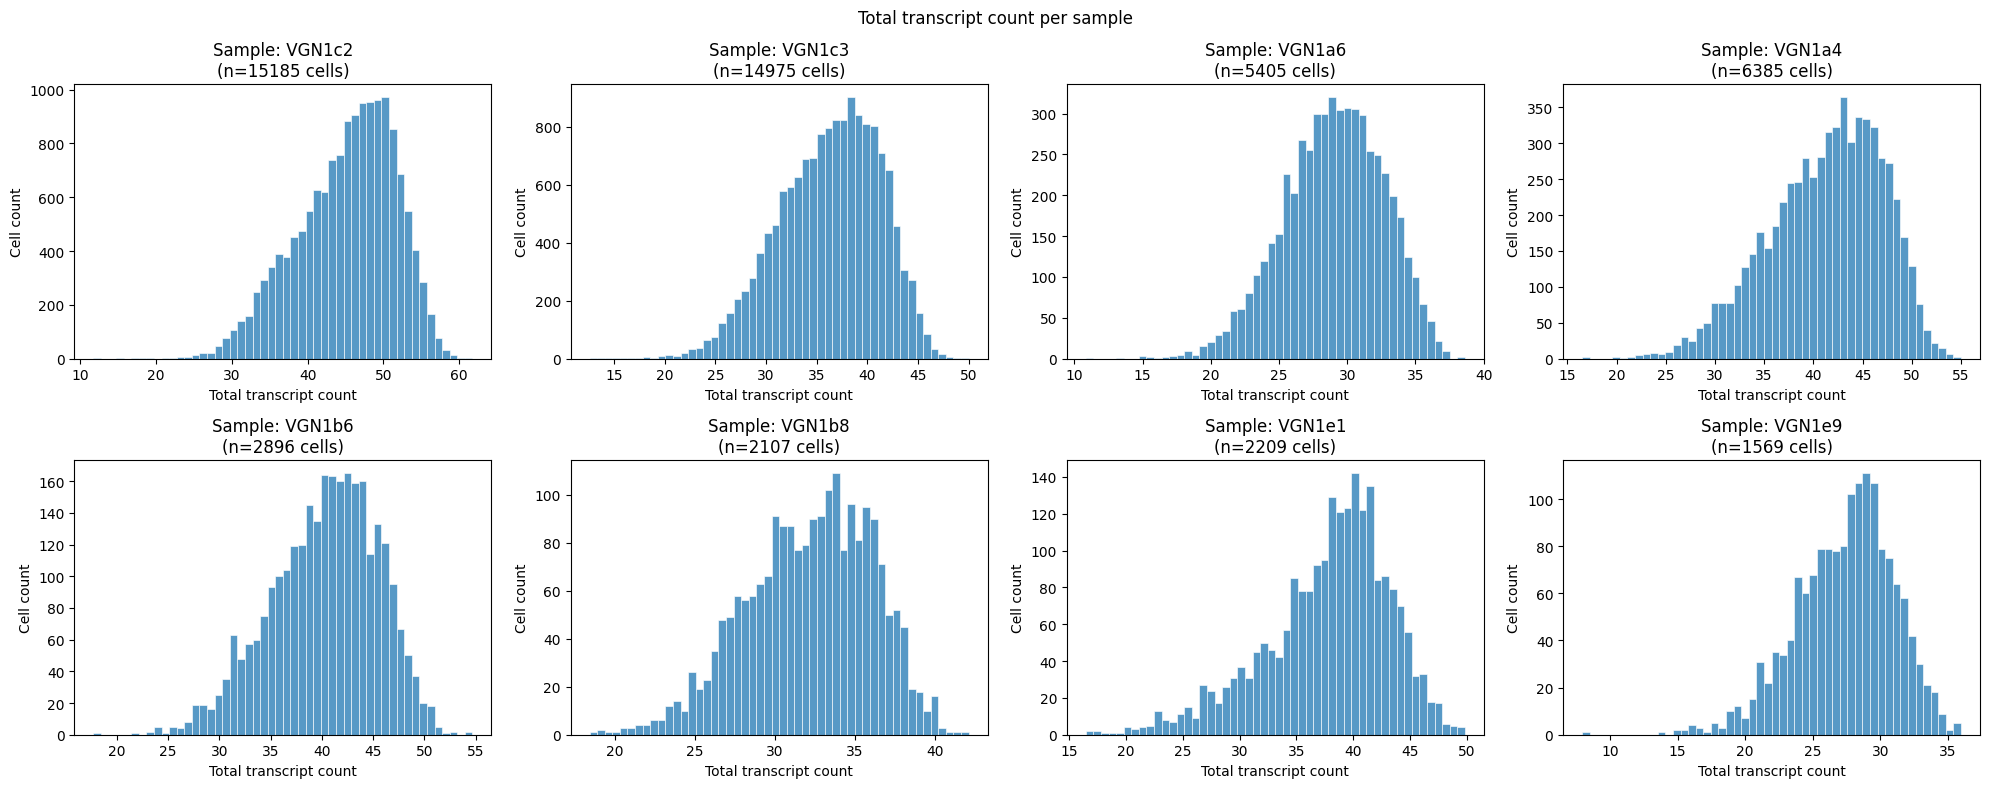

In [47]:

# Get list of unique samples
samples = normalised_expression_data['sample'].unique()

# Define number of rows and columns
n_cols = 4
n_rows = (len(samples) + n_cols - 1) // n_cols  # ceiling division to fit all samples

# Create subplots
fig, axs = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows), sharey=False)  # no sharey
axs = axs.flatten()  # flatten to 1D list for easy indexing

fig.suptitle('Total transcript count per sample')

# Loop over each sample
for i, sample in enumerate(samples):
    sample_data = normalised_expression_data[normalised_expression_data['sample'] == sample]
    sns.histplot(
        sample_data['total_transcript_count'],
        kde=False,
        bins=50,
        ax=axs[i],
        edgecolor="white"
    )
    axs[i].set_title(f"Sample: {sample}\n(n={sample_data.shape[0]} cells)")
    axs[i].set_xlabel('Total transcript count')
    axs[i].set_ylabel('Cell count')

# Hide any unused subplots if samples < n_rows * n_cols
for j in range(i + 1, len(axs)):
    axs[j].axis('off')

plt.tight_layout()
plt.show()


### plot the total transcripts per cell after normalisation (per sample) 

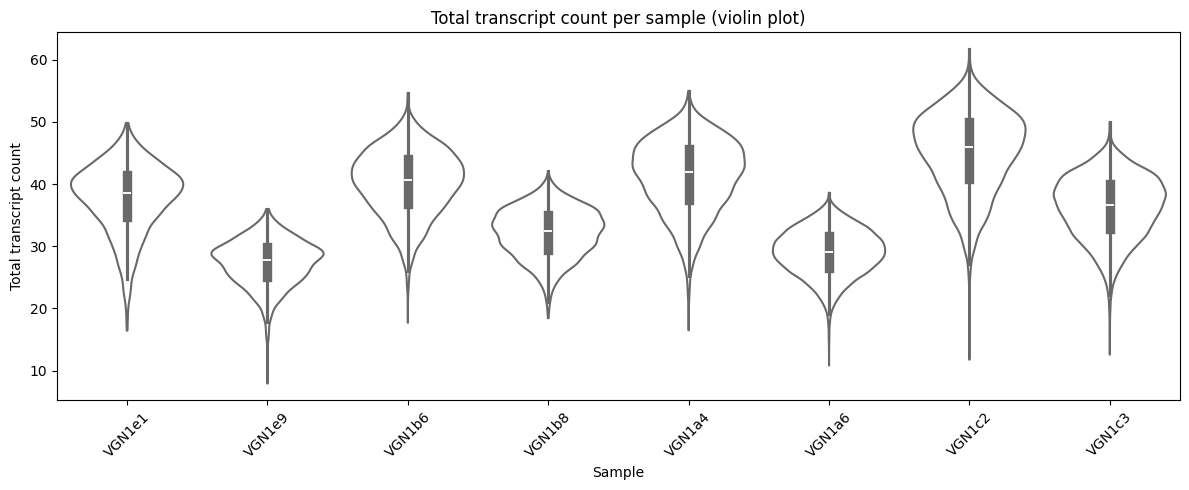

In [48]:
desired_sample_order = ['VGN1e1', 'VGN1e9','VGN1b6', 'VGN1b8', 'VGN1a4', 'VGN1a6',  'VGN1c2', 'VGN1c3']  # <-- your custom order


plt.figure(figsize=(12, 5))
sns.violinplot(
    data=normalised_expression_data,
    x='sample',
    y='total_transcript_count',
    inner='box',       # show a boxplot inside the violin
    cut=0,
    order = desired_sample_order,
    scale='width', 
    color = 'dimgray',
    fill = False 
)

plt.title("Total transcript count per sample (violin plot)")
plt.xlabel("Sample")
plt.ylabel("Total transcript count")
plt.xticks(rotation=45)  # rotate sample labels if needed
plt.tight_layout()
plt.savefig('qc/figures/AfterNorm_TranscriptCount_PerCell_ViolinPlot.svg', dpi = 600)
plt.show()


### what do transcript counts per cell look like after normalisation across a sample? 

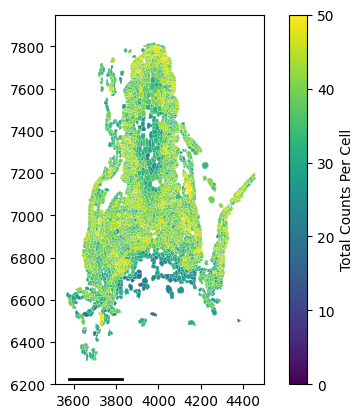

In [50]:
segmentation_df = gpd.read_parquet('cell_segmentation/VGN1e_region1_output/cellpose2_micron_space_VGN1e1.parquet')
transcripts_df = pd.read_csv('cell_segmentation/VGN1e_region1_output/detected_transcripts_VGN1e1.csv') 

# Filter to create a new AnnData object with only the sample 'VGN1e1' with my cluster information included
adata_VGN1e1_vis = adata_VGN1e1.copy()

adata_VGN1e1_vis.obs.index = [index.split('-')[0] for index in adata_VGN1e1_vis.obs.index]

# Convert adata_VGN1e1_vis.obs to a dataframe and reset the index to make the index a column
adata_VGN1e1_df = adata_VGN1e1_vis.obs.reset_index()

# Extract id for all cells in my VGN1e1 sample 
adata_VGN1e1_df = adata_VGN1e1_df.rename(columns={'index': 'cell_id'})
adata_VGN1e1_df['cell_id'] = adata_VGN1e1_df['cell_id'].astype(str).str.strip()
cell_ids = adata_VGN1e1_df['cell_id'].tolist()
cell_ids = [cell_id.strip() for cell_id in cell_ids]


# Convert EntityID in filtered_segmentation_df to strings to match with cell_ids
filtered_segmentation_df = segmentation_df.copy()
filtered_segmentation_df['EntityID'] = filtered_segmentation_df['EntityID'].astype(str)

# Now filter based on matching values in cell_ids
filtered_segmentation_df = filtered_segmentation_df[filtered_segmentation_df['EntityID'].isin(cell_ids)]

#now filter out transcripts that aren't in my cells to make things run faster
# Ensures that filtered_segmentation_df is a GeoDataFrame with geometries representing spatial areas (e.g., polygons).
filtered_segmentation_df = gpd.GeoDataFrame(filtered_segmentation_df, geometry='Geometry')

# Converts transcripts_df into a GeoDataFrame where each transcript is represented as a point geometry derived from its global_x and global_y coordinates.
transcripts_gdf = gpd.GeoDataFrame(
    transcripts_df,
    geometry=gpd.points_from_xy(transcripts_df['global_x'], transcripts_df['global_y'])
)

# Matches transcript points (transcripts_gdf) to spatial regions (filtered_segmentation_df) using a spatial join (predicate='within').
filtered_transcripts_gdf = gpd.sjoin(
    transcripts_gdf,
    filtered_segmentation_df[['EntityID', 'Geometry']],
    how='inner',
    predicate='within'
)

# Remove unnecessary columns and duplicates
filtered_transcripts_df = (
    filtered_transcripts_gdf
    .drop(columns=['index_right', 'Unnamed: 0'], errors='ignore')  # Drop join-related columns
    .drop_duplicates()  # Remove duplicate rows
)

# Reset the index for clarity
filtered_transcripts_df.reset_index(drop=True, inplace=True)

# grab the gene expression values from dataset
gene_expression_df = pd.DataFrame(
    adata_VGN1e1_vis.X.toarray() if hasattr(adata_VGN1e1_vis.X, 'toarray') else adata_VGN1e1_vis.X,
    index=adata_VGN1e1_vis.obs_names,
    columns=adata_VGN1e1_vis.var_names
)
gene_expression_df = gene_expression_df.reset_index().rename(columns={'index': 'EntityID'})
gene_expression_df['Total_Counts'] = gene_expression_df.drop(columns=['EntityID']).sum(axis=1)


#copy the filtered dataset
filtered_segmentation_df2 = filtered_segmentation_df.copy()

#
gene_expression_df['EntityID'] = gene_expression_df['EntityID'].astype(str)
filtered_segmentation_df2['EntityID'] = filtered_segmentation_df2['EntityID'].astype(str)

# Merge dataframes on 'EntityID', keeping only the necessary column
filtered_segmentation_df2 = filtered_segmentation_df2.merge(
    gene_expression_df[['EntityID', 'Total_Counts']],
    on='EntityID',
    how='left'
)

min_x = filtered_segmentation_df2['Geometry'].bounds.minx.min()
max_x = filtered_segmentation_df2['Geometry'].bounds.maxx.max()
min_y = filtered_segmentation_df2['Geometry'].bounds.miny.min()
max_y = filtered_segmentation_df2['Geometry'].bounds.maxy.max()

# Rotation logic
if 'Original_Geometry' not in filtered_segmentation_df2.columns:
    filtered_segmentation_df2['Original_Geometry'] = filtered_segmentation_df2['Geometry']

# Define rotation angle in degrees
rotation_angle = 22
angle_rad = np.radians(rotation_angle)

# Calculate the rotation matrix components
cos_theta = np.cos(angle_rad)
sin_theta = np.sin(angle_rad)

# Get the centroid of the entire sample as the rotation origin
centroid_x = (min_x + max_x) / 2  # Use the previously computed min_x, max_x
centroid_y = (min_y + max_y) / 2  # Use the previously computed min_y, max_y

# Rotation matrix for Shapely's affine_transform (a, b, d, e, xoff, yoff)
rotation_matrix = [
    cos_theta, -sin_theta,  # a, b
    sin_theta, cos_theta,   # d, e
    centroid_x - cos_theta * centroid_x + sin_theta * centroid_y,  # xoff
    centroid_y - sin_theta * centroid_x - cos_theta * centroid_y   # yoff
]

# Rotate the original geometries
rotated_geometries = filtered_segmentation_df2['Original_Geometry'].apply(
    lambda geom: affine_transform(geom, rotation_matrix)
)
filtered_segmentation_df2['Geometry'] = rotated_geometries

# Initialize colormap
colormap = cm.get_cmap('viridis')  # You can use other colormaps like 'plasma' or 'cividis'
norm = colors.Normalize(vmin=0, vmax=50)

# Plot the heatmap
fig, ax = plt.subplots()
patches_list = []

for _, row in filtered_segmentation_df2.iterrows():
    shape = row['Geometry']
    normalized_value = row['Total_Counts']
    color = colormap(norm(normalized_value))

    if isinstance(shape, MultiPolygon):
        for poly in shape.geoms:
            patch = patches.Polygon(
                list(poly.exterior.coords), closed=True, facecolor=color, edgecolor='white', linewidth=0.1
            )
            patches_list.append(patch)
    elif isinstance(shape, Polygon):
        patch = patches.Polygon(
            list(shape.exterior.coords), closed=True, facecolor=color, edgecolor='white', linewidth=0.1
        )
        patches_list.append(patch)

# Set axis limits
ax.set_ylim(6200, 7950)
ax.set_xlim(3510, 4500)
ax.set_aspect('equal')

# Use PatchCollection to handle all patches
collection = PatchCollection(patches_list, match_original=True)
ax.add_collection(collection)

# Add the scale bar
scale_bar_length_microns = 250 # Length of scale bar in microns
scale_bar_x_start = 3575      # X-coordinate for the start of the scale bar
scale_bar_y_start = 6225       # Y-coordinate for the start of the scale bar
scale_bar_length_units = scale_bar_length_microns  # Assuming 1 unit = 1 micron


scale_bar = Line2D(
    [scale_bar_x_start, scale_bar_x_start + scale_bar_length_microns],
    [scale_bar_y_start, scale_bar_y_start],
    color="black",
    linewidth=2
)
ax.add_line(scale_bar)

# Add colorbar
plt.colorbar(cm.ScalarMappable(norm=norm, cmap=colormap), ax=ax, label="Total Counts Per Cell")
ax.set_facecolor('white')
plt.savefig('qc/figures/TotalTranscriptsPerCell_AfterNormalisation_LDR.png', dpi = 600)
plt.show()


In [51]:
max_value = filtered_segmentation_df2['Total_Counts'].max()
print("Maximum value of Total_Counts:", max_value)

Maximum value of Total_Counts: 49.844826


## I will save each filtered and normalised anndata object to use in later analysis 

In [52]:
# Define a list of adata objects and their corresponding filenames
adata_objects = [
    ("qc/adata_VGN1a6_clean", adata_VGN1a6),
    ("qc/adata_VGN1a4_clean", adata_VGN1a4),
    ("qc/adata_VGN1b6_clean", adata_VGN1b6),
    ("qc/adata_VGN1b8_clean", adata_VGN1b8),
    ("qc/adata_VGN1e1_clean", adata_VGN1e1),
    ("qc/adata_VGN1e9_clean", adata_VGN1e9),
    ("qc/adata_VGN1c2_clean", adata_VGN1c2),
    ("qc/adata_VGN1c3_clean", adata_VGN1c3)
]

# Save each AnnData object to an .h5ad file
for name, adata in adata_objects:
    filename = f"{name}.h5ad"  # Create a filename based on the object name
    adata.write(filename)     # Save the AnnData object
    print(f"Saved {name} to {filename}")

Saved qc/adata_VGN1a6_clean to qc/adata_VGN1a6_clean.h5ad
Saved qc/adata_VGN1a4_clean to qc/adata_VGN1a4_clean.h5ad
Saved qc/adata_VGN1b6_clean to qc/adata_VGN1b6_clean.h5ad
Saved qc/adata_VGN1b8_clean to qc/adata_VGN1b8_clean.h5ad
Saved qc/adata_VGN1e1_clean to qc/adata_VGN1e1_clean.h5ad
Saved qc/adata_VGN1e9_clean to qc/adata_VGN1e9_clean.h5ad
Saved qc/adata_VGN1c2_clean to qc/adata_VGN1c2_clean.h5ad
Saved qc/adata_VGN1c3_clean to qc/adata_VGN1c3_clean.h5ad
